In [10]:
%matplotlib inline
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import discrete

import re
import pandas as pd
import math 
import csv
import time
import dateutil
from datetime import datetime
import seaborn as sns

In [127]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")
sns.set_context("poster")

In [12]:
# Matplotlib Formatting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import ticker
"""
mpl.rcParams["axes.grid"]=False
mpl.rcParams["xtick.major.size"] = 4
mpl.rcParams["xtick.minor.size"] = 2
mpl.rcParams["xtick.major.width"] = 0.5 
mpl.rcParams["xtick.minor.width"] = 0.5 

mpl.rcParams["ytick.major.size"] = 4
mpl.rcParams["ytick.minor.size"] = 2
mpl.rcParams["ytick.major.width"] = 0.5 
mpl.rcParams["ytick.minor.width"] = 0.5 
"""

millnames = ['',' Thousand',' Million',' Billion',' Trillion']
def millify(n, pos):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    thingtoreturn = n / 10**(3 * millidx)
    if thingtoreturn % 1 == 0:
        return '{:.0f}{}'.format(thingtoreturn, millnames[millidx])
    elif thingtoreturn % 0.1 == 0:
        return '{:.1f}{}'.format(thingtoreturn, millnames[millidx])
    else:
        return '{:.2f}{}'.format(thingtoreturn, millnames[millidx])

In [13]:
#mpl.rcdefaults()
#%matplotlib inline

In [128]:
from IPython.core.display import HTML
HTML("<style>.container {width:50% !important; }</style>")

# What is Below?


| Data | Source |
|:----------|:----------|
|*budget / expenditure* breadown by economic and functional classifications | Serbian Ministry of State Administration and Local Self Government\* |
|*income* breakdown by economic classifications | Serbian Secretariat for Regulatory Impact Assessment\* | 
|*political affiliation* data | collected and compiled by the author |
|*demographic* data | Serbian National Statistics Office| 


><sub>\*As of 2011, legal obligation to annually submit municipal accounting records to the Serbian Ministry of Finance was abandoned. To the best of the author's knowledge, no central repository of this information currently exists. The data I analyze was individually requested and compiled by different government bodies. As such, some data integrity issues arise which are noted and dealth with below.</sub>


* First, we briefly explore and clean the *spending*, *income* and *political affiliation* datasets. We save these as the <code>budgetsdf</code>, <code>incomesdf</code>, and <code>paneldf</code> dataframes.  


* Second, we create a new dataframe, <code>maindf</code>, indexed over municipalities: 
    * We merge *aggregate measures* from the first three information sources.
    * We merge demographic data.
    
* Finally, we have a couple important dataframes:
    - budgetsdf (fully broken down budget lines)
    - incomesdf (
    - maindf (
    - 
    - 


### To do:
- ~~clean use of latin, probably convert everything to english characters~~
- ~~clean data types~~
- get all the municipality names, see who is missing from the dataset
- reporting trends:
    - histograms, by year: x - number of book lines reported (i.e. numeric entries), y - number of municipalities (separate colored bars for planned lines and actual lines)   
    - ~~histogram: x - number of years anything was reported, y - number of municipalities~~
    - ~~bar chart: x - year, y - number of municipalities who reported anything at all in that year~~
- find out which economic classifications get reported the most/least (i.e. what actually gets reported, what rarely):
    - ~~make a bar chart with all economic classifications as x axis, categorical, and then y axis be the number of districts who reported them at least once~~
    - ~~another chart, same as above, except y axis the total number of districts that report them~~
- total budget and spending trends:
    - ~~get, by year: median, mean expenditure/income reported~~ (not that helpful)
    - ~~histograms, by year: y - number of municipalities (separate plots or even graphs altogether for income and expenditure level), x - total expenditure/income by municipality~~
    - ~~top and bottom 10% of spending and income across year, as well as within years~~
    - look for biggest relative year to year differences in budgeting/spending (last_year/this_year-1) 
    - 
- trends related to planned vs actual spending:
    - get absolute differences in total planned vs total actuals by year (take a look at distribution)
    - get relative differences in total planned vs total actuals (take a look at distribution)
    - see which districts are best/worst on average in abs/relative terms
    - look at absolute and relative overspending by year, municipality, economic class
    - see which economic classes have the most overspending on average
    - see which economic classes have the largest incidence of overspending
 
- explore budget/expenditure breakdowns by economic/functional classification:
    - share of each economic/functional category and group in munality and year-wide totals
    - get average share of economic/functional categories and groups in municipality total spending across years (so one large municipality spending a lot more on something doesnt skew its general representation)
    - look for economic/functional groups/categories with largest variance across municipalities, but also largest average variance across years within municipalities
    - 
    - share of economic/functional classes within groups of particular interest
- Income Data:
    - analyze general breakdown
    - 
- Connect with demographic data from RZS:
    - population and age, sex breakdowns
    - income distributions? unemployment, etc
    - 

- Connect with political data:


- Start Running Regressions:


- Random things to check:
    - da li broj zena uu odboru ili prosecan uzrast odbornika nekako utice na stabilnost 

    


## Coding and Classification Labels

**Municipal Codes**

In [15]:
municipal_codes_df = pd.read_csv("./General Info/Municipal Code Matching.csv")

In [16]:
municipal_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
mb     174 non-null int64
mun    174 non-null object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


**Spending Economic Classes** 

In [17]:
econ_breakdown = pd.read_csv("./Budgets/econ_breakdown.csv")

In [18]:
econ_breakdown.columns

Index([u'ec_div_id', u'ec_div_name_english', u'ec_group_id', u'ec_group_name_english', u'ec_class_id', u'ec_class_name_english'], dtype='object')

In [19]:
for col in [u'ec_div_id', u'ec_group_id', u'ec_class_id']:
    econ_breakdown[col] = econ_breakdown[col].fillna(-1).astype(int)

In [20]:
econ_breakdown.dtypes

ec_div_id                 int32
ec_div_name_english      object
ec_group_id               int32
ec_group_name_english    object
ec_class_id               int32
ec_class_name_english    object
dtype: object

In [21]:
econ_breakdown.head()

,ec_div_id,ec_div_name_english,ec_group_id,ec_group_name_english,ec_class_id,ec_class_name_english
0,0,unclassified,0,unclassified,0,Unclassified
1,4,current expenditures,41,Compensation of employees,411,"Salaries, allowances, and compensation of empl..."
2,5,Expenditures related to non-financial assets,42,Use of goods and services,412,Social contributions paid by the employer
3,6,Expenditures for principals and the acquisitio...,43,depreciation and use of the funds for work,413,Compensation in kind
4,-1,NaN,44,Interest paid and the accompanying costs of bo...,414,Social benefits for employees


**Spending Functional Classes**

In [22]:
func_breakdown = pd.read_csv("./Budgets/func_breakdown.csv")

C:\Users\nolefp\AppData\Roaming\Python\Python27\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
func_breakdown.columns

Index([u'func_div_id', u'func_div_name_english', u'func_group_id', u'func_group_name_english', u'func_class_id', u'func_class_name_english'], dtype='object')

In [24]:
for col in [u'func_div_id', u'func_group_id', u'func_class_id']:
    func_breakdown[col] = func_breakdown[col].fillna(-1).astype(int)

In [25]:
func_breakdown.dtypes

func_div_id                 int32
func_div_name_english      object
func_group_id               int32
func_group_name_english    object
func_class_id               int32
func_class_name_english    object
dtype: object

In [26]:
func_breakdown.head()

,func_div_id,func_div_name_english,func_group_id,func_group_name_english,func_class_id,func_class_name_english
0,1,General Public Services,0,unclassified,0,unclassified
1,2,Defence,1,Sickness and disability,10,Sickness and disability
2,3,Public Order and Safety,2,Old age,20,age
3,4,Economic Affairs,3,Survivors (family pensions),30,Users of family pensions
4,5,Environmental Protection,4,Family and children,40,Family and children


**Income Classification**

In [27]:
income_breakdown = pd.read_csv("./Budgets/income_breakdown.csv")

In [28]:
income_breakdown.head()

,l2,l2_name,l2_name_english,l3,l3_name,l3_name_english,l4,l4_name,l4_name_english,l6,l6_name,l6_name_english
0,"5,001.00",TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,Current income and income from sale of non-fin...,"5,002.00",TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,Current income,"5,003.00",POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...,Taxes,5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...","Taxes on income, profits and capital gains"
1,"5,129.00",PRIMANjA OD ZADUZIVANjA I PRODAJE FINANSIJSKE ...,Revenue from debt and sale of financial assets,"5,104.00",PRIMANjA OD PRODAJE NEFINANSIJSKE IMOVINE (510...,Income from the sale of non-financial assets,"5,047.00",SOCIJALNI DOPRINOSI (5048 + 5053),Social contributions,5008,POREZ NA FOND ZARADA (5009),Taxes on payroll and workforce
2,nan,NaN,NaN,"5,130.00",PRIMANjA OD ZADUZIVANjA (5131 + 5141),Income from borrowing,"5,057.00",DONACIJE I TRANSFERI (5058 + 5061 + 5064),Donations and transfers,5010,POREZ NA IMOVINU (od 5011 do 5016),Taxes on property
3,nan,NaN,NaN,"5,149.00",PRIMANjA OD PRODAJE FINANSIJSKE IMOVINE (5150 ...,Income from the sale of financial assets,"5,067.00",DRUGI PRIHODI (5068 + 5075 + 5080 + 5087 + 5090),Other income,5017,POREZ NA DOBRA I USLUGE (od 5018 do 5022),Taxes on goods and services
4,nan,NaN,NaN,nan,NaN,NaN,"5,092.00",MEMORANDUMSKE STAVKE ZA REFUNDACIJU RASHODA (5...,Memorandum items for the refunding of expendit...,5023,POREZ NA MEDJUNARODNU TRGOVINU I TRANSAKCIJE (...,Taxes on international trade and transactions


In [29]:
income_breakdown.columns

Index([u'l2', u'l2_name', u'l2_name_english', u'l3', u'l3_name', u'l3_name_english', u'l4', u'l4_name', u'l4_name_english', u'l6', u'l6_name', u'l6_name_english'], dtype='object')

In [30]:
codes_income =          [u'l2', u'l3', u'l4', u'l6']
names_income =          [u'l2_name', u'l3_name', u'l4_name', u'l6_name']
names_english_income =  [u'l2_name_english', u'l3_name_english', u'l4_name_english', u'l6_name_english']

for col in codes_income:
    income_breakdown[col] = income_breakdown[col].fillna(-1).astype(int)

# BUDGETS

## Pre-Processing

**Cleaning Cyrillic-Latin Characters and Economic and Functional Classifications**

- For some reason, the original data set contained a mix of submissions in Serbian Latin and Serbian Cyrillic. It appears that the discrepancy is caused by Local Governments (LG) using one, while National agencies the other. I first grab all unique combinations of econ/func class codes and names. I then compile a set of all codes and their latin names and re-assign the names to the functional and economic classes in the main table. 

- Because displaying Serbian latin characters is difficult across different platforms I replace these characters with their english alphabet equivalents {c,c,s,dj,z} using excel's search and replace function. 

- Lots of classifications have names that differ by a comma, or some sort of formatting. I arbitrarily choose one standard format and apply it to all. 

**Number / Data Type Formatting**

* All columns needed to be formatted according to their datatype and then mistakes (like double periods in the same field, or a "+") had to be removed in order for the documents to be properly read by pandas. 

**Missing Values**

- There are some entries for which there is no economic/functional classification. The sum of their values does not seem too large. 
- These are now marked with the id "0" and the label "unclassified"


** Translating to English**

- I translate all economic and functional classes to english to the best of my abilities. First using google translate, then cross referencing with official categorizations by the IMF (economic classes) and the eu statistics website (functional classes).

**Same Categories, Different ID-s**

- Some functional classes differ due to 040 and 40 differences. I change all values to remove leading 0-s. 

- functional classes 113 and 120 both go to "spoljni poslovi", I switch all 120 to be 113. Same with 50, 60 and unemployment, I switch all to 50 (though both seem to be used quite widely). 

**Different Levels of Aggregation, Same Column**

- It seems that the functional "classes" have overlap in aggregation. Namely, all categories that end with a round ten, like 310, or 450, actually incorporate everything through the next decile. It is unclear at this point if any districts submitted both levels of aggregation, which would lead to double counting, or if there is a clear division between districts submitting at one level vs the other... To check, we could look for cases where the same district (or just iterated across all districts) used both levels in the same year... Hopefully this will not exist...

- Another repercussion of this unclarity is that when we are looking at the breakdowns of spending, we should be aggregating at the lowest level that ALL municipalities report. First of all, it's probably good enough. But second, that way we don't wrongly divide between two things that actually are the same... If there is a third level of de-aggregation entry with only two levels of de-aggregation, it might make sense to add it to the third sub-level, "unclassified" category

##  Load & Set-Up

In [31]:
# load the budgets document
budgetsdf = pd.read_csv("./Budgets/preprocessed_Municipal Budgets.csv", 
                        parse_dates=True, dtype={"Maticni broj": object, 
                                                 "Izvrsenje budzeta": np.float64, 
                                                 "Plan budzeta": np.float64})

In [32]:
budgetsdf.dtypes

Pozicija                          object
Plan budzeta                     float64
Izvrsenje budzeta                float64
Maticni broj                      object
Institucionalna jedinica          object
Godina                           float64
Nivo drzave                       object
Funkcionalna kategorija            int64
Naziv funkcionalne kategorije     object
Funkcionalna grupa                 int64
Naziv funkcionalne grupe          object
Funkcionalna klasa                 int64
Naziv funkcionalne klase          object
Ekonomska kategorija               int64
Naziv ekonomske kategorije        object
Ekonomska grupa                    int64
Naziv ekonomske grupe             object
Ekonomska klasa                    int64
Naziv ekonomske klase             object
Unnamed: 19                      float64
Unnamed: 20                      float64
Unnamed: 21                      float64
Unnamed: 22                      float64
dtype: object

In [33]:
# change column names getting rid of Serbian characters
new_columns = ['pozicija','plan', 'izvrsenje', 'mb', 'instit_jed', 'godina',
 'nivo_drzave', 'funkc_kat','funkc_kat_ime', 'funkc_grupa','funkc_grupa_ime', 
               'funkc_klasa','funkc_klasa_ime','ekonomska_kat','ekonomska_kat_ime',
               'ekonomska_grupa','ekonomska_grupa_ime', 'ekonomska_klasa', 'ekonomska_klasa_ime',
                'unnamed: 19', 'unnamed: 20','unnamed: 21','unnamed: 22']
                   
budgetsdf.columns = new_columns                   

In [34]:
del budgetsdf['unnamed: 19']
del budgetsdf['unnamed: 20']
del budgetsdf['unnamed: 21']
del budgetsdf['unnamed: 22']

In [35]:
# change categorical data
for column in [ 'instit_jed','nivo_drzave','funkc_kat','funkc_kat_ime', 'funkc_grupa', 'funkc_grupa_ime',
                'funkc_klasa', 'funkc_klasa_ime','ekonomska_kat','ekonomska_kat_ime', 
               'ekonomska_grupa', 'ekonomska_grupa_ime', 'ekonomska_klasa', 'ekonomska_klasa_ime']:
    budgetsdf[column] = budgetsdf[column].astype('category')

In [36]:
budgetsdf[budgetsdf["godina"].isnull()]

,pozicija,plan,izvrsenje,mb,instit_jed,godina,nivo_drzave,funkc_kat,funkc_kat_ime,funkc_grupa,funkc_grupa_ime,funkc_klasa,funkc_klasa_ime,ekonomska_kat,ekonomska_kat_ime,ekonomska_grupa,ekonomska_grupa_ime,ekonomska_klasa,ekonomska_klasa_ime
11622,50,0.00,0.00,NaN,NaN,nan,Lokalni nivo,8,"Rekreacija, Sport, Kultura i Vere",82,Usluge kulture,820,Usluge kulture,5,Izdaci za nefinansijsku imovinu,51,Osnovna sredstva,512,Masine i oprema
27442,100,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano
80873,160,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano
105833,160,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano
113043,106,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano
127820,120,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano
135582,176,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano
137447,299,0.00,0.00,NaN,NaN,nan,Lokalni nivo,7,Zdravstvo,76,Zdravstvo neklasifikovano na drugom mestu,760,Zdravstvo neklasifikovano na drugom mestu,4,Tekuci rashodi,46,Donacije dotacije i transferi,463,Transferi ostalim nivoima vlasti
138352,119,0.00,0.00,NaN,NaN,nan,Lokalni nivo,10,Socijalna Zastita,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano,0,Neklasifikovano


As you can see above, for some reason there were cells with missing values for year and budget and expenditures, so we get rid of those...

In [37]:
# drop entires with null year and no info
budgetsdf.drop(budgetsdf[budgetsdf["godina"].isnull()].index,inplace=1)

In [38]:
# change datatype of years
budgetsdf["godina"]= budgetsdf["godina"].astype(np.int32)

In [39]:
# In order to change to int, we first fillna with -1
budgetsdf.mb = budgetsdf['mb'].fillna(-1).astype(np.int32)

In [40]:
# drop unecessary row pozicija
budgetsdf.drop("pozicija", axis=1,inplace=1)

In [41]:
budgetsdf.dtypes

plan                    float64
izvrsenje               float64
mb                        int32
instit_jed             category
godina                    int32
nivo_drzave            category
funkc_kat              category
funkc_kat_ime          category
funkc_grupa            category
funkc_grupa_ime        category
funkc_klasa            category
funkc_klasa_ime        category
ekonomska_kat          category
ekonomska_kat_ime      category
ekonomska_grupa        category
ekonomska_grupa_ime    category
ekonomska_klasa        category
ekonomska_klasa_ime    category
dtype: object

** Adjust values so they are in 100s of RSD**

In [42]:
# get real dinar values
budgetsdf[["plan", "izvrsenje"]] = budgetsdf[["plan", "izvrsenje"]] * 10

**Add English Classifications**

In [43]:
econ_breakdown.columns

Index([u'ec_div_id', u'ec_div_name_english', u'ec_group_id', u'ec_group_name_english', u'ec_class_id', u'ec_class_name_english'], dtype='object')

In [44]:
func_breakdown.columns

Index([u'func_div_id', u'func_div_name_english', u'func_group_id', u'func_group_name_english', u'func_class_id', u'func_class_name_english'], dtype='object')

In [45]:
budgetsdf.columns

Index([u'plan', u'izvrsenje', u'mb', u'instit_jed', u'godina', u'nivo_drzave', u'funkc_kat', u'funkc_kat_ime', u'funkc_grupa', u'funkc_grupa_ime', u'funkc_klasa', u'funkc_klasa_ime', u'ekonomska_kat', u'ekonomska_kat_ime', u'ekonomska_grupa', u'ekonomska_grupa_ime', u'ekonomska_klasa', u'ekonomska_klasa_ime'], dtype='object')

In [46]:
# append english econ classification names
for key_left, key_right, english_name in zip([u'ekonomska_kat', u'ekonomska_grupa', u'ekonomska_klasa'], 
                                             [u'ec_div_id', u'ec_group_id', u'ec_class_id'], 
                                             [u'ec_div_name_english', u'ec_group_name_english', u'ec_class_name_english']):
    
    budgetsdf = budgetsdf.merge(econ_breakdown[[key_right, english_name]] , how="left", left_on=key_left, right_on=key_right) 

# append english func classification names:
for key_left, key_right, english_name in zip([u'funkc_kat', u'funkc_grupa', u'funkc_klasa'], 
                                             [u'func_div_id', u'func_group_id',  u'func_class_id'], 
                                             [ u'func_div_name_english',  u'func_group_name_english', u'func_class_name_english']):
    
    budgetsdf = budgetsdf.merge(func_breakdown[[key_right, english_name]] , how="left", left_on=key_left, right_on=key_right)

In [47]:
budgetsdf.head()

,plan,izvrsenje,mb,instit_jed,godina,nivo_drzave,funkc_kat,funkc_kat_ime,funkc_grupa,funkc_grupa_ime,funkc_klasa,funkc_klasa_ime,ekonomska_kat,ekonomska_kat_ime,ekonomska_grupa,ekonomska_grupa_ime,ekonomska_klasa,ekonomska_klasa_ime,ec_div_id,ec_div_name_english,ec_group_id,ec_group_name_english,ec_class_id,ec_class_name_english,func_div_id,func_div_name_english,func_group_id,func_group_name_english,func_class_id,func_class_name_english
0,0.00,"151,136,066.00",-1,Budzet republike,2013,Centralni nivo,10,Socijalna Zastita,1,Bolest i invalidnost,10,Bolest i invalidnost,4,Tekuci rashodi,47,Socijalno osiguranje i socijalna zastita,472,Naknade za socijalnu zastitu iz budzeta,4,current expenditures,47,Social security and social protection,472,Fees for social protection from the budget,10,Social Protection,1,Sickness and disability,10,Sickness and disability
1,0.00,"521,131.60",-1,Budzet republike,2013,Centralni nivo,10,Socijalna Zastita,1,Bolest i invalidnost,10,Bolest i invalidnost,4,Tekuci rashodi,42,Koriscenje usluga i roba,424,Specijalizovane usluge,4,current expenditures,42,Use of goods and services,424,specialized services,10,Social Protection,1,Sickness and disability,10,Sickness and disability
2,0.00,"769,110.90",-1,Budzet republike,2013,Centralni nivo,10,Socijalna Zastita,1,Bolest i invalidnost,10,Bolest i invalidnost,4,Tekuci rashodi,48,Ostali rashodi,483,Novcane kazne i penali po resenju sudova,4,current expenditures,48,Other expenses,483,Fines and penalties determined by courts,10,Social Protection,1,Sickness and disability,10,Sickness and disability
3,0.00,"511,939.50",-1,Budzet republike,2013,Centralni nivo,10,Socijalna Zastita,1,Bolest i invalidnost,10,Bolest i invalidnost,4,Tekuci rashodi,48,Ostali rashodi,481,Dotacije nevladinim organizacijama,4,current expenditures,48,Other expenses,481,Grants to NGOs,10,Social Protection,1,Sickness and disability,10,Sickness and disability
4,0.00,"351,475.10",-1,Budzet republike,2013,Centralni nivo,10,Socijalna Zastita,1,Bolest i invalidnost,10,Bolest i invalidnost,4,Tekuci rashodi,42,Koriscenje usluga i roba,421,Stalni troskovi,4,current expenditures,42,Use of goods and services,421,Standing expenses,10,Social Protection,1,Sickness and disability,10,Sickness and disability


In [48]:
# change categorical data
for column in ([u'ec_div_id', u'ec_group_id', u'ec_class_id'] + 
               [u'ec_div_name_english', u'ec_group_name_english',  u'ec_class_name_english'] + 
               [u'func_div_id', u'func_group_id',  u'func_class_id'] + 
               [ u'func_div_name_english',  u'func_group_name_english', u'func_class_name_english']):
    budgetsdf[column] = budgetsdf[column].astype('category')

** Rename Columns and Remove Serbian Columns **

In [49]:
budgetsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138833 entries, 0 to 138832
Data columns (total 30 columns):
plan                       138738 non-null float64
izvrsenje                  138832 non-null float64
mb                         138833 non-null int32
instit_jed                 138833 non-null object
godina                     138833 non-null int32
nivo_drzave                138833 non-null object
funkc_kat                  138833 non-null int64
funkc_kat_ime              138833 non-null object
funkc_grupa                138833 non-null int64
funkc_grupa_ime            138833 non-null object
funkc_klasa                138833 non-null int64
funkc_klasa_ime            138833 non-null object
ekonomska_kat              138833 non-null int64
ekonomska_kat_ime          138833 non-null object
ekonomska_grupa            138833 non-null int64
ekonomska_grupa_ime        138833 non-null object
ekonomska_klasa            138833 non-null int64
ekonomska_klasa_ime        138827 non-null ob

In [50]:
# get rid of random columns
budgetsdf.drop(['funkc_kat','funkc_kat_ime', 'funkc_grupa', 'funkc_grupa_ime', 'funkc_klasa', 
                                        'funkc_klasa_ime','ekonomska_kat','ekonomska_kat_ime', 'ekonomska_grupa', 
                                        'ekonomska_grupa_ime', 'ekonomska_klasa', 'ekonomska_klasa_ime'], axis=1, inplace=1)

In [51]:
budgetsdf.columns

Index([u'plan', u'izvrsenje', u'mb', u'instit_jed', u'godina', u'nivo_drzave', u'ec_div_id', u'ec_div_name_english', u'ec_group_id', u'ec_group_name_english', u'ec_class_id', u'ec_class_name_english', u'func_div_id', u'func_div_name_english', u'func_group_id', u'func_group_name_english', u'func_class_id', u'func_class_name_english'], dtype='object')

In [52]:
budgetsdf.columns =  [u'plan', u'actual', u'mun_id', u'mun', u'year', u'nivo_drzave', u'ec_div_id', u'ec_div_name_english', 
                                 u'ec_group_id', u'ec_group_name_english', u'ec_class_id', u'ec_class_name_english', u'func_div_id', 
                                 u'func_div_name_english', u'func_group_id', u'func_group_name_english', u'func_class_id', u'func_class_name_english']

** Get rid of 0s in 2015 Actual, make them NaNs**

In [53]:
budgetsdf.loc[budgetsdf.year == 2015, "actual"] = np.nan

## Basic EDA

### Summarization

In [54]:
print "Rows:", len(budgetsdf)
budgetsdf.head()

Rows: 138833


,plan,actual,mun_id,mun,year,nivo_drzave,ec_div_id,ec_div_name_english,ec_group_id,ec_group_name_english,ec_class_id,ec_class_name_english,func_div_id,func_div_name_english,func_group_id,func_group_name_english,func_class_id,func_class_name_english
0,0.00,"151,136,066.00",-1,Budzet republike,2013,Centralni nivo,4,current expenditures,47,Social security and social protection,472,Fees for social protection from the budget,10,Social Protection,1,Sickness and disability,10,Sickness and disability
1,0.00,"521,131.60",-1,Budzet republike,2013,Centralni nivo,4,current expenditures,42,Use of goods and services,424,specialized services,10,Social Protection,1,Sickness and disability,10,Sickness and disability
2,0.00,"769,110.90",-1,Budzet republike,2013,Centralni nivo,4,current expenditures,48,Other expenses,483,Fines and penalties determined by courts,10,Social Protection,1,Sickness and disability,10,Sickness and disability
3,0.00,"511,939.50",-1,Budzet republike,2013,Centralni nivo,4,current expenditures,48,Other expenses,481,Grants to NGOs,10,Social Protection,1,Sickness and disability,10,Sickness and disability
4,0.00,"351,475.10",-1,Budzet republike,2013,Centralni nivo,4,current expenditures,42,Use of goods and services,421,Standing expenses,10,Social Protection,1,Sickness and disability,10,Sickness and disability


In [55]:
budgetsdf.describe(include=['number'])

,plan,actual,mun_id,year
count,"138,738.00","107,864.00","138,833.00","138,833.00"
mean,"581,746.11","488,548.91","73,786.80","2,013.10"
std,"23,076,864.80","30,076,355.85","10,628.47",1.41
min,0.00,"-8,740.00",-1.00,"2,011.00"
25%,"1,000.00",335.30,"70,637.00","2,012.00"
50%,"6,000.00","3,772.55","71,145.00","2,013.00"
75%,"31,250.00","24,403.85","80,217.00","2,014.00"
max,"4,994,000,000.00","5,080,601,900.00","89,010.00","2,015.00"


In [56]:
budgetsdf.describe(include=['category'])

,ec_div_id,ec_div_name_english,ec_group_id,ec_group_name_english,ec_class_id,ec_class_name_english,func_div_id,func_div_name_english,func_group_id,func_group_name_english,func_class_id,func_class_name_english
count,138833,138833,138833,138833,138833,138833,138833,138833,138833,138833,138833,138833
unique,4,4,17,17,63,62,10,10,70,70,105,104
top,4,current expenditures,42,Use of goods and services,423,Contract services,1,General Public Services,82,Cultural services,820,Cultural services
freq,122340,122340,53999,53999,12125,12125,46890,46890,18430,18430,18430,18430


### Institutional Units

In [57]:
# see which institutional units are included
np.array(budgetsdf.mun.unique())

array(['Budzet republike', 'NSZ', 'RFPIO', 'RFZO',
       'JP "Putevi Srbije" i JP "Koridori"', 'Ada', 'Alibunar', 'Apatin',
       'Arandjelovac', 'Babusnica', 'Backa Palanka', 'Backa Topola',
       'Backi Petrovac', 'Bajina Basta', 'Becej', 'Bela Crkva', 'Beocin',
       'Beograd-Grad', 'Beograd-Mladenovac', 'Beograd-Novi Beograd',
       'Beograd-Palilula', 'Beograd-Rakovica', 'Beograd-Vracar',
       'Beograd-Zemun', 'Beograd-Zvezdara', 'Blace', 'Bogatic', 'Bojnik',
       'Bosilegrad', 'Brus', 'cacak-grad', 'cajetina', 'coka',
       'Crna Trava', 'cuprija', 'Despotovac', 'Doljevac', 'Gadzin Han',
       'Golubac', 'Gornji Milanovac', 'Ivanjica', 'Jagodina-grad',
       'Kanjiza', 'Kikinda', 'Kladovo', 'Knic', 'Knjazevac', 'Koceljeva',
       'Kostolac', 'Kovacica', 'Kovin', 'Kraljevo-grad', 'Krupanj',
       'Krusevac-grad', 'Kucevo', 'Kula', 'Kursumlija', 'Lajkovac',
       'Lapovo', 'Leskovac-grad', 'Ljig', 'Ljubovija', 'Loznica-grad',
       'Mali Zvornik', 'Medvedja', 'Mioni

We remove any entities that are not municipalities.

In [58]:
# find non-municipalities
list(budgetsdf[budgetsdf.nivo_drzave == "Centralni nivo"].mun.unique())

['Budzet republike',
 'NSZ',
 'RFPIO',
 'RFZO',
 'JP "Putevi Srbije" i JP "Koridori"']

In [59]:
# remove non-municipalities
budgetsdf.drop(budgetsdf[budgetsdf.nivo_drzave == "Centralni nivo"].index, inplace=1)
budgetsdf.drop(budgetsdf[budgetsdf.mun.apply(lambda x: x in ['NSZ', 'RFPIO', 'RFZO', 
                                                                    'JP "Putevi Srbije" i JP "Koridori"', "Budzet republike"
])].index, inplace=1)

The district vracar gets reported with mb 70144 in this dataset. However, elsewhere, vracar gets coded with 70114, hence I convert here to avoid further confusion. 

In [60]:
budgetsdf.replace(70144, 70114, inplace=1)

### Reporting

In [61]:
# how many municipalities reported each year
grpd_year = budgetsdf.groupby('year')
grpd_year.mun.nunique()

year
2011    119
2012    120
2013    120
2014    120
2015    120
Name: mun, dtype: int64

In [62]:
# number of munipalities per total number of years reported (don't get why removed institutional units appear to have remained...)
grpd_mun = budgetsdf.groupby('mun')
mun_years_submitted = grpd_mun.year.nunique()
mun_years_submitted.value_counts()

5    119
4      1
Name: year, dtype: int64

In [63]:
# Check which mun has 4 and 0 submissions
print mun_years_submitted[mun_years_submitted == 4]
print mun_years_submitted[mun_years_submitted == 0]

mun
Varvarin    4
Name: year, dtype: int64
Series([], Name: year, dtype: int64)


**prep data for economics and functional breakdown reporting**

In [64]:
# prepare data for reporting
grpd_year_mun = budgetsdf.groupby(['year', 'mun'])

# get number of different economic class plan lines submitted
grpd_year_mun_reported_econ_class = grpd_year_mun.ec_class_name_english.agg(pd.Series.nunique)

# get number of different functional class plan lines submitted
grpd_year_mun_reported_func_class = grpd_year_mun.func_class_name_english.agg(pd.Series.nunique)


In [65]:
#count unique municipality/year entries
budgetsdf['godina_instit'] = budgetsdf.year.apply(str) + budgetsdf.year.apply(str)

#groupby economic/functional class
frequency_of_reporting_economic_class = budgetsdf.groupby('ec_class_name_english').godina_instit.nunique()
frequency_of_reporting_func_class = budgetsdf.groupby('ec_class_name_english').godina_instit.nunique()

municipalities_reported_economic_class = budgetsdf.groupby('ec_class_name_english').mun.nunique()
municipalities_reported_func_class = budgetsdf.groupby('ec_class_name_english').mun.nunique()

**Economic Class Reporting Charts**

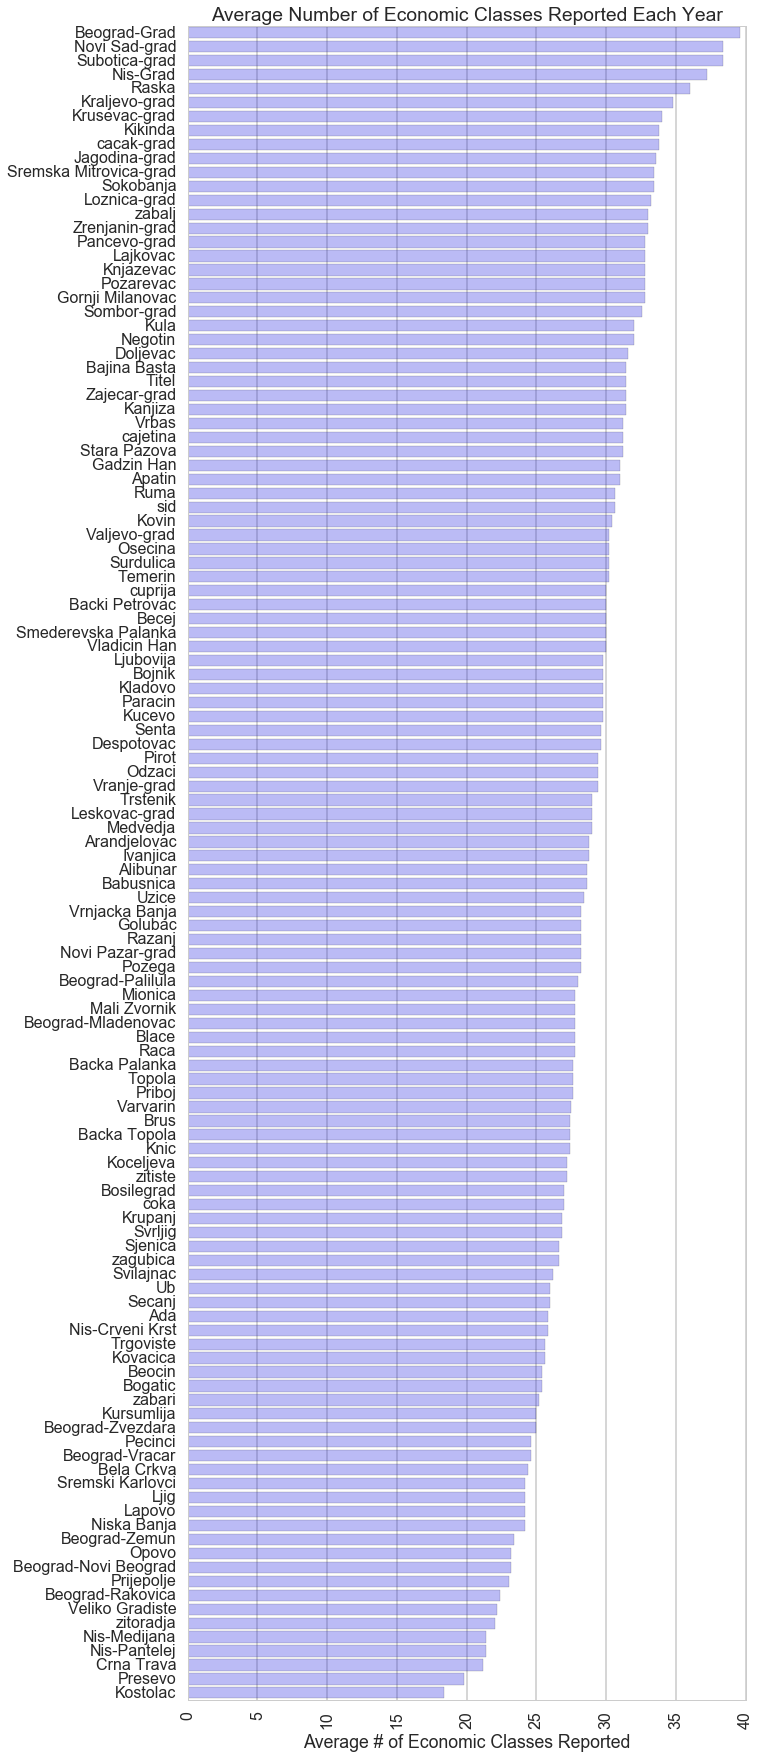

In [66]:
# distribution of economic class reporting per municipality
plt.figure(figsize=(10,30))

# get and sort appropriate data
data = grpd_year_mun_reported_econ_class.mean(level=1)
data.sort_values(inplace=1, ascending=0)
y = np.array(data.index)
x = np.array(data.values)


sns.barplot(x,y, color='blue', alpha=.3)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

plt.title("Average Number of Economic Classes Reported Each Year")
plt.xlabel("Average # of Economic Classes Reported");

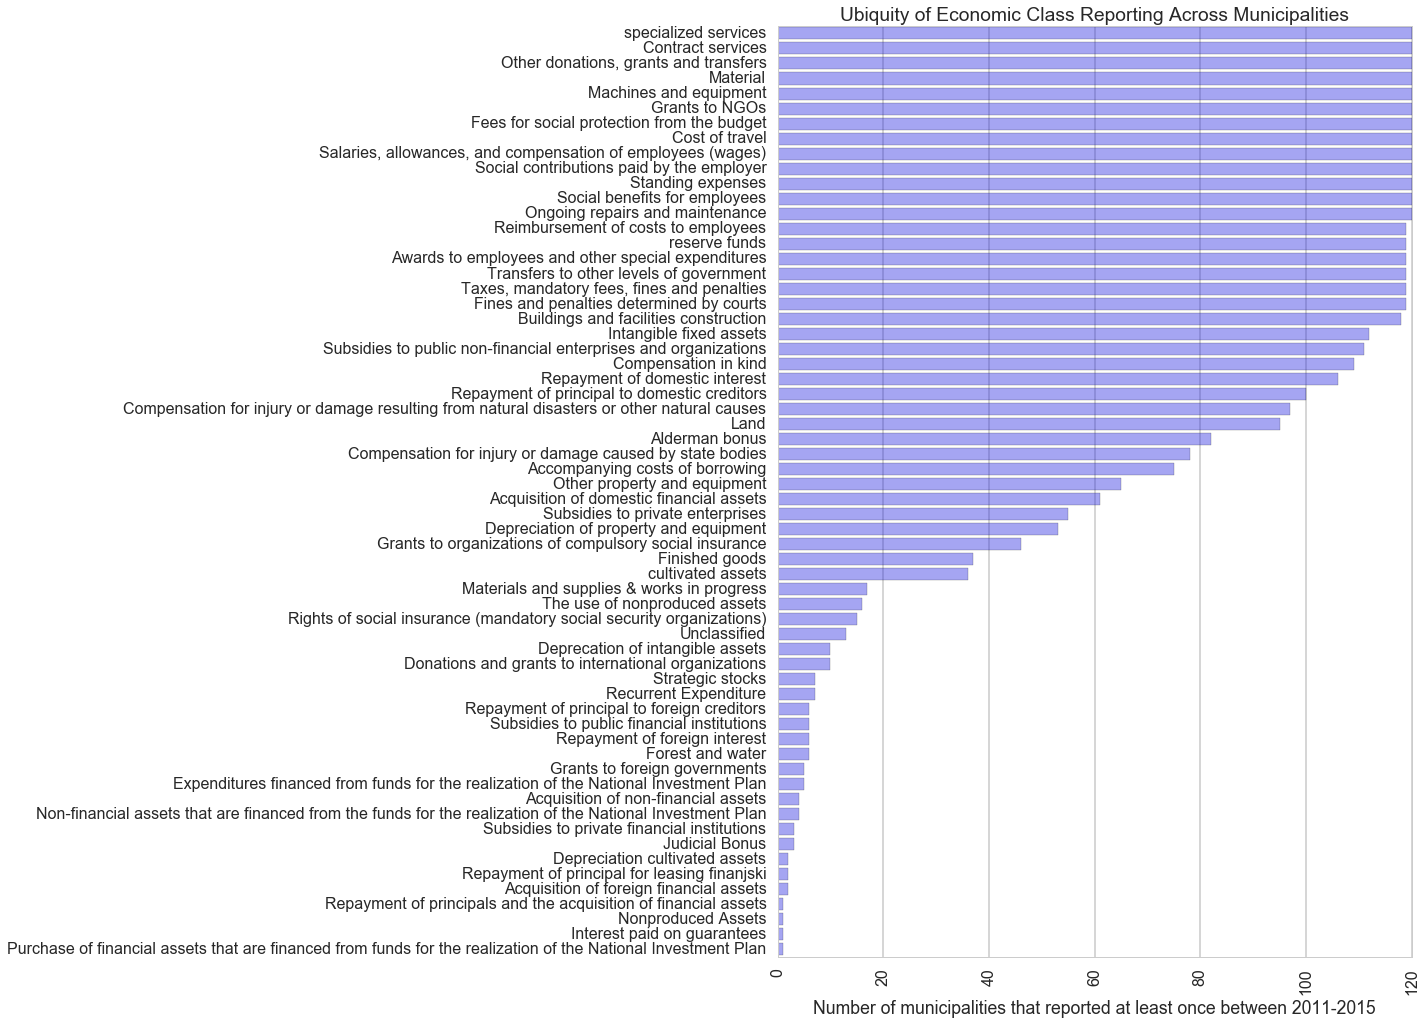

In [67]:
# ubiquity of reporting of economic class
fig, ax = plt.subplots(figsize=(10,14))
fig.tight_layout()

data = municipalities_reported_economic_class
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

# set label and title values
plt.xlabel("Number of municipalities that reported at least once between 2011-2015")
plt.title("Ubiquity of Economic Class Reporting Across Municipalities");


**Functional Class Reporting**

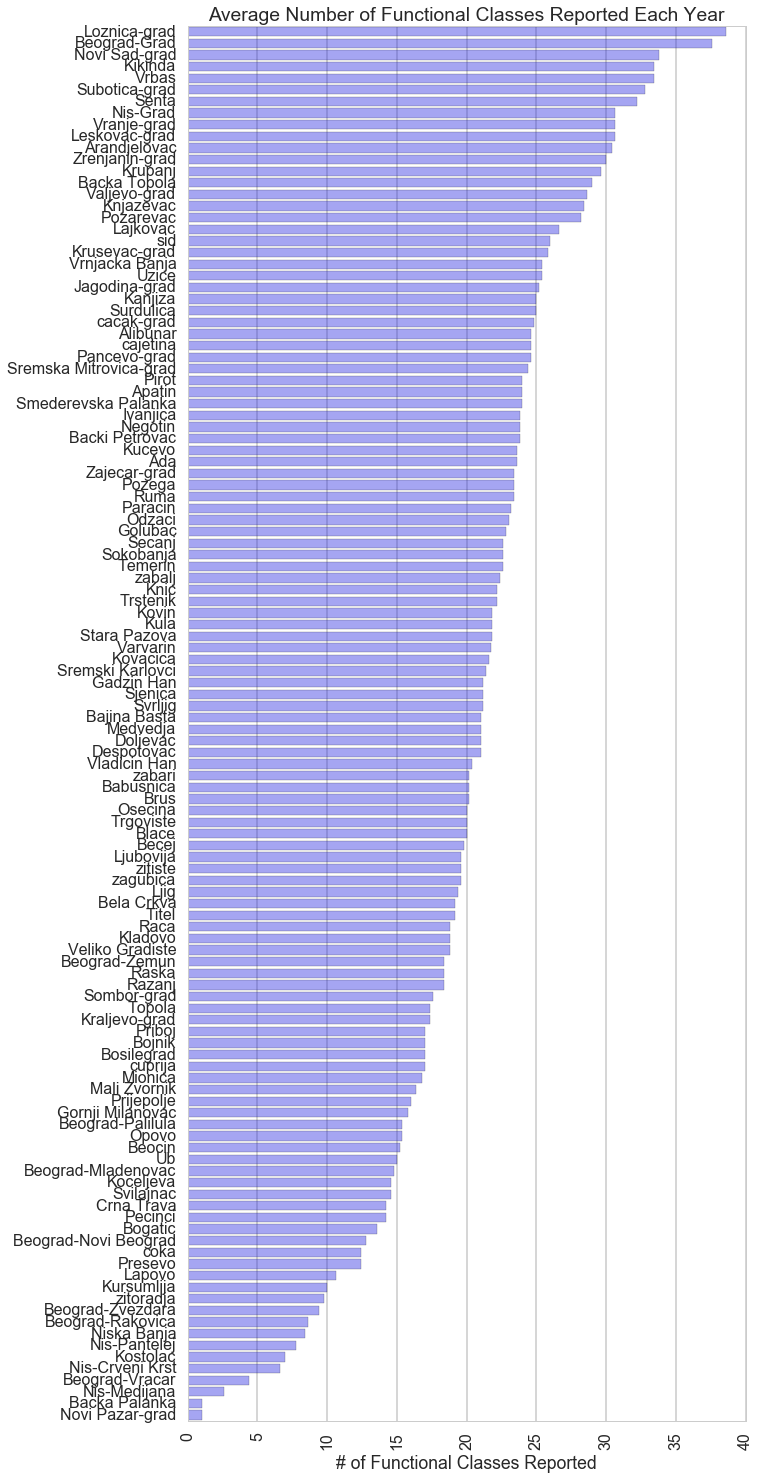

In [68]:
# distribution of functional class reporting per municipality

plt.figure(figsize=(10,25))

# get and sort appropriate data
data = grpd_year_mun_reported_func_class.mean(level=1)
data.sort_values(inplace=1, ascending=0)
y = np.array(data.index)
x = np.array(data.values)


sns.barplot(x,y, color='blue', alpha=.4)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

plt.title("Average Number of Functional Classes Reported Each Year")
plt.xlabel("# of Functional Classes Reported");

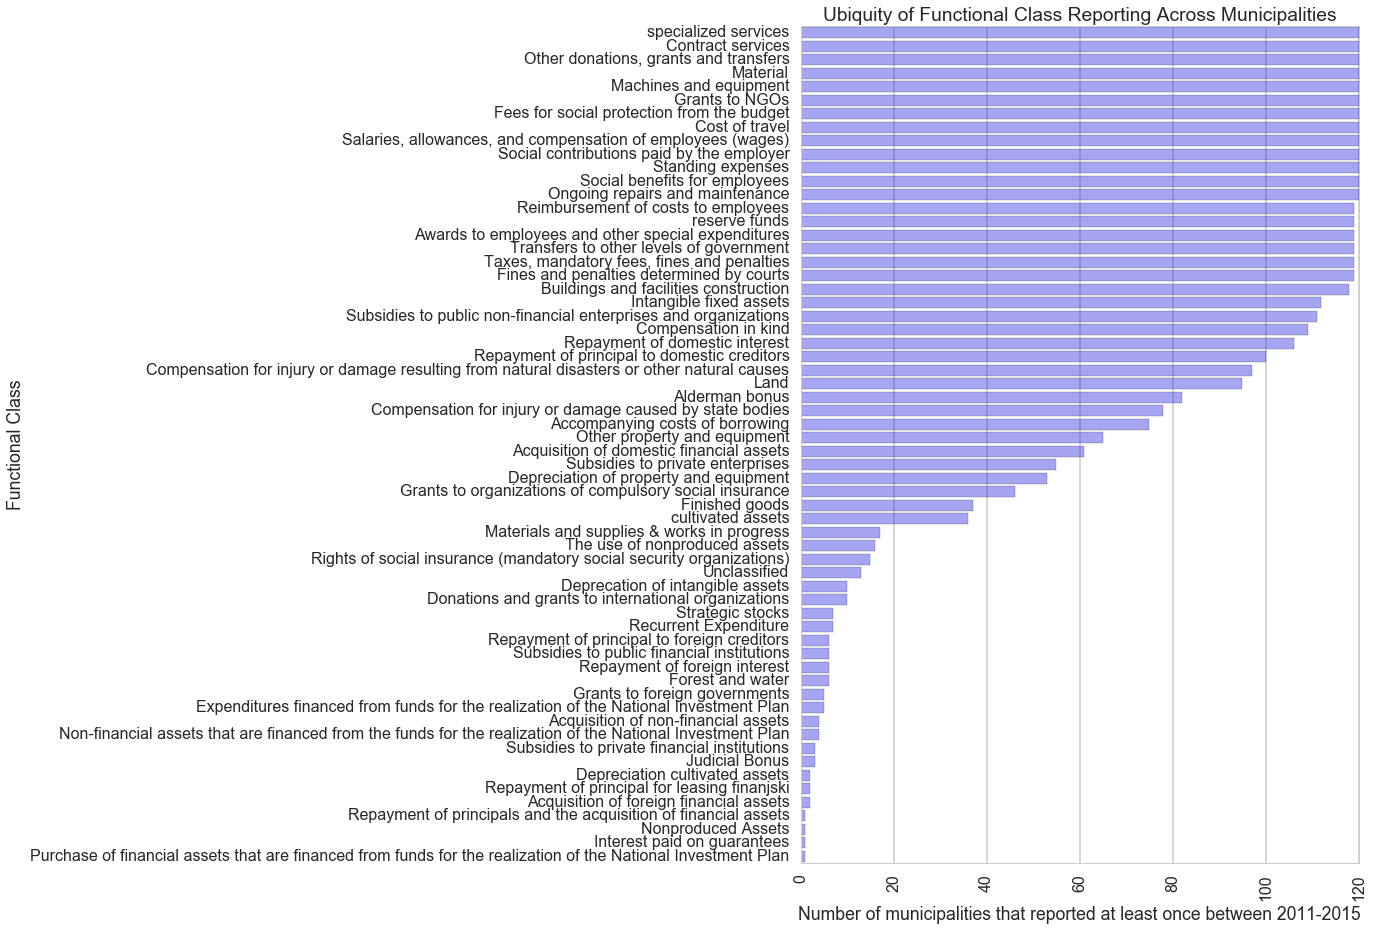

In [69]:
# ubiquity of functional class reporting
plt.figure(figsize=(10,15))
data = municipalities_reported_func_class
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

# set label and title values
plt.ylabel('Functional Class')
plt.xlabel("Number of municipalities that reported at least once between 2011-2015")
plt.title("Ubiquity of Functional Class Reporting Across Municipalities");


### Distribution of Totals

In [70]:
# aggregate totals
year_mun_sum_df = grpd_year_mun[['actual','plan']].agg(np.sum)

average_annual_totals_mun = budgetsdf.groupby(["mun","year"]).agg(sum).mean(axis=0,level=0)


**Annual Totals**

In [71]:
# budget totals
budgetsdf.groupby("year").plan.sum()

year
2011    2,330,546,116.80
2012    2,631,796,725.10
2013    2,445,389,224.00
2014    2,401,110,600.60
2015   60,302,634,728.60
Name: plan, dtype: float64

*note the 30 times larger value for 2015, something is off

*also note that the budgets are larger for 2012 and there is an even greater difference for expenditure

In [72]:
# expenditure totals
budgetsdf.groupby("year").actual.sum()

year
2011   1,889,249,038.70
2012   2,200,613,743.80
2013   2,025,698,645.70
2014   1,919,233,795.10
2015                nan
Name: actual, dtype: float64

 **Budget Totals Over Years**

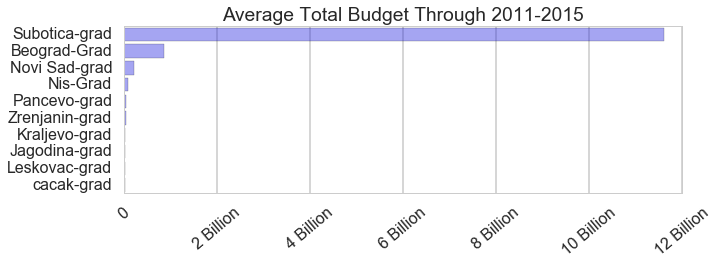

In [73]:
#average budgets 2011-2015 per muncipality

# change number formatting
fig, ax = plt.subplots(figsize=(10,3))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millify))

data = average_annual_totals_mun.plan.copy()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)[:10]
y = np.array(data.values)[:10]

sns.barplot(y,x, color='blue', alpha=.4)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=40);


# set label and title values
plt.title("Average Total Budget Through 2011-2015");

Clearly, there is something wrong with the data for subotica... 

Turns out 2015 was multiplied by 1,000 throughout, we adjust and keep going. 

In [74]:
budgetsdf.loc[(budgetsdf.mun == "Subotica-grad") & (budgetsdf.year == 2015.0), "plan"] = budgetsdf[(budgetsdf.mun == "Subotica-grad") & (budgetsdf.year == 2015.0)]["plan"] / 1000

Back to what we were doing!

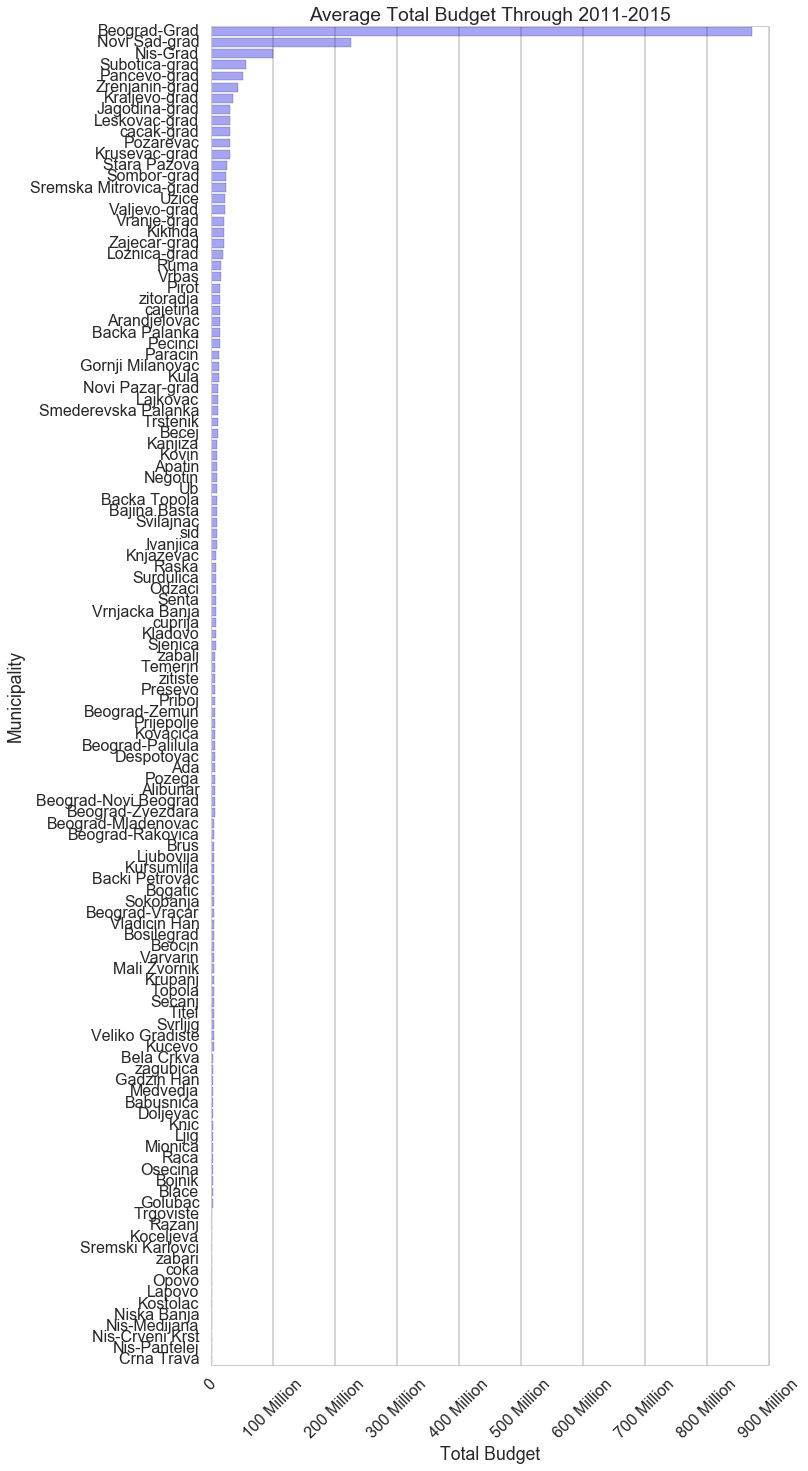

In [75]:
# average total budgets per mun
fig, ax = plt.subplots(figsize=(10,24))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millify))

average_annual_totals_mun = budgetsdf.groupby(["mun","year"]).agg(sum).mean(axis=0,level=0)
data = average_annual_totals_mun.plan.copy()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

# set label and title values
plt.ylabel('Municipality')
plt.xlabel("Total Budget")
plt.title("Average Total Budget Through 2011-2015");

In [76]:
# sanity check belgrade
budgetsdf[budgetsdf.mun == "Beograd-Grad"].groupby("year").sum()

,plan,actual,mun_id
year,,,
2011,"959,399,726.70","809,628,106.00",33976020
2012,"1,057,420,743.70","908,016,072.00",35951370
2013,"780,000,919.10","724,773,091.00",32790810
2014,"766,807,519.50","665,769,110.30",38321790
2015,"802,691,535.10",nan,55783884


In [77]:
# check out one of the lowest municipalities
budgetsdf[budgetsdf.mun == "Niska Banja"].groupby("year").sum()

,plan,actual,mun_id
year,,,
2011,"1,643,000.00","1,054,560.00",4134530
2012,"1,656,000.00","1,125,550.00",3778105
2013,"2,652,150.00","1,037,370.00",3635535
2014,"1,737,300.00","1,044,860.00",3635535
2015,"1,452,600.00",nan,5417660


**Expenditure Totals Over Years**

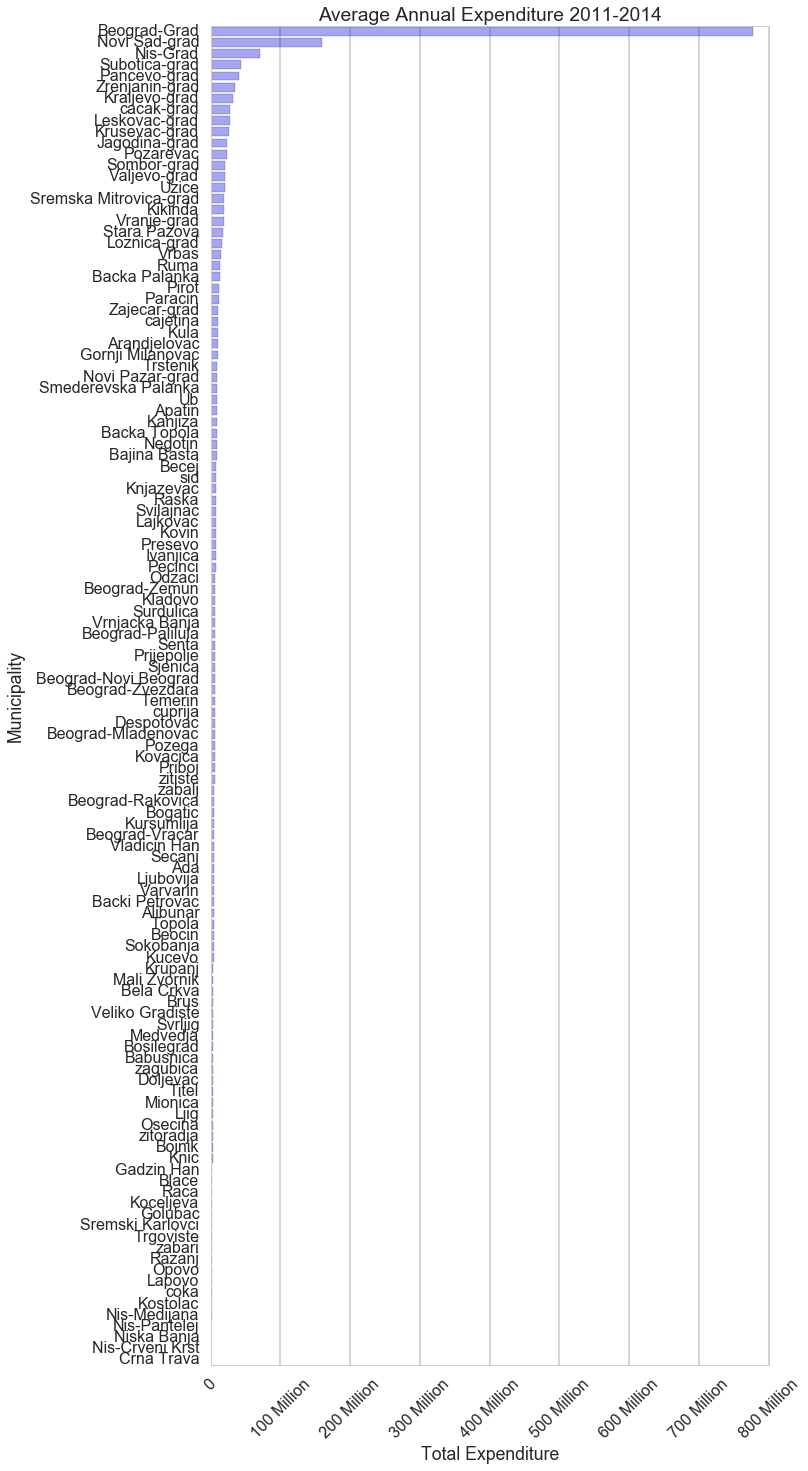

In [78]:
# chart code
fig, ax = plt.subplots(figsize=(10,24))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millify))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

data = average_annual_totals_mun.actual.copy()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

# set label and title values
plt.ylabel('Municipality')
plt.xlabel("Total Expenditure")
plt.title("Average Annual Expenditure 2011-2014");

**Over/Under Shooting Budgets**

Next, we examine the difference between planned budgets and total spending reported. Below you can see the 20 biggest differences between planned and actual spending. It seems unbelievably low, but perhaps there really is such discipline. Perhaps there is less discipline when it comes to the public companies.

In [79]:
# prepare data
mun_year_sums = budgetsdf.groupby(["mun","year"]).agg(sum)

mun_year_sums["razlika"] =  mun_year_sums["plan"] - mun_year_sums["actual"]

mun_year_sums.razlika.sort_values(ascending=0) 

mun              year
Beograd-Grad     2011   149,771,620.70
                 2012   149,404,671.70
                 2014   101,038,409.20
Novi Sad-grad    2013    82,839,762.00
                 2012    74,254,279.10
                 2014    73,752,281.10
                 2011    60,000,171.30
Beograd-Grad     2013    55,227,828.10
Nis-Grad         2014    32,624,240.00
                 2013    32,456,770.00
                 2012    28,229,840.00
Subotica-grad    2011    20,433,010.00
Zajecar-grad     2014    17,200,821.40
Nis-Grad         2011    15,232,270.00
Pancevo-grad     2011    14,820,814.90
Stara Pazova     2013    14,431,916.10
Pancevo-grad     2014    13,561,165.00
Jagodina-grad    2011    11,631,260.00
Subotica-grad    2013    11,476,270.00
Pancevo-grad     2013    11,283,882.90
Subotica-grad    2014    10,705,340.00
Pozarevac        2014    10,670,870.00
Zajecar-grad     2011    10,635,641.30
Subotica-grad    2012    10,258,620.00
Zrenjanin-grad   2013     9,765,231.60
Poz

In [80]:
# measure relative change in budget line
# this would be better adapted so that it normalizes relative to total budget for the district for the year, more meaningful measure
def relative_change(df):
    if df.plan == 0:
        if df.actual == 0:
            return 0
        else: 
            return -1
        
    if df.actual == 0:
        return 1
    
    if df.actual > df.plan:
        return 1 - df.actual/df.plan
    
    if df.plan > df.actual:
        return df.actual/df.plan


Values:
 - 0: budget and eactual expenditure equal to one another
 - 1: budgeted, but no spending at all
 - -1: not budgeted, but there is spending

In [81]:
# get sum of budgets and spending within institutional units, years and economic class, exclude 2015)
mun_year_ec_class_sums = budgetsdf[budgetsdf.year != 2015.0].groupby(["mun","year","ec_class_name_english"]).agg(sum)

# create new column for the difference in spending 
mun_year_ec_class_sums["budget_min_spending"] =  mun_year_ec_class_sums["plan"] - mun_year_ec_class_sums["actual"]
mun_year_ec_class_sums["budget_min_spending_rel"] = mun_year_ec_class_sums.apply(relative_change, axis=1)


In [82]:
# planned - actual spending by mun by year
mun_year_ec_class_sums.budget_min_spending.sort_values(ascending=1).dropna()

mun                     year  ec_class_name_english                                                                     
Kraljevo-grad           2011  Compensation for injury or damage resulting from natural disasters or other natural causes   -1,480,000.00
Sremska Mitrovica-grad  2013  Buildings and facilities construction                                                        -1,244,790.00
Leskovac-grad           2012  Fines and penalties determined by courts                                                       -841,340.00
Ada                     2012  Standing expenses                                                                              -816,390.00
Ub                      2011  Cost of travel                                                                                 -684,550.00
Ivanjica                2013  Transfers to other levels of government                                                        -681,520.00
Ub                      2011  Transfers to other levels o

In [83]:
# planned / actual spending by mun by year
mun_year_ec_class_sums.budget_min_spending_rel.sort_values(ascending=-1).dropna()

mun                  year  ec_class_name_english                                                                     
Beograd-Grad         2011  Finished goods                                                                               -398.33
Ub                   2011  Compensation in kind                                                                         -300.48
Gornji Milanovac     2012  Accompanying costs of borrowing                                                              -195.62
Trgoviste            2011  Land                                                                                         -149.32
Beograd-Grad         2013  Finished goods                                                                               -129.60
Knjazevac            2012  Acquisition of domestic financial assets                                                     -123.72
Beograd-Grad         2011  Depreciation of property and equipment                                                 

In [84]:
# average abs over/under spending by economic class
mun_year_ec_class_sums.budget_min_spending.dropna().mean(axis=0, level=2).sort_values(ascending=1)

ec_class_name_english
Depreciation of property and equipment                                                                             -3,915.77
Repayment of principal for leasing finanjski                                                                       -1,818.00
Depreciation cultivated assets                                                                                       -100.00
Judicial Bonus                                                                                                        -50.00
Deprecation of intangible assets                                                                                      -16.27
Nonproduced Assets                                                                                                      0.00
Repayment of principals and the acquisition of financial assets                                                         0.00
Interest paid on guarantees                                                                            

## Export to budget_detail.csv

In [85]:
budgetsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136630 entries, 2203 to 138832
Data columns (total 19 columns):
plan                       136629 non-null float64
actual                     106382 non-null float64
mun_id                     136630 non-null int32
mun                        136630 non-null object
year                       136630 non-null int32
nivo_drzave                136630 non-null object
ec_div_id                  136630 non-null category
ec_div_name_english        136630 non-null category
ec_group_id                136630 non-null category
ec_group_name_english      136630 non-null category
ec_class_id                136630 non-null category
ec_class_name_english      136630 non-null category
func_div_id                136630 non-null category
func_div_name_english      136630 non-null category
func_group_id              136630 non-null category
func_group_name_english    136630 non-null category
func_class_id              136630 non-null category
func_class_nam

In [86]:
export_budgets_detail = budgetsdf.drop("nivo_drzave", axis=1)

** add the shares **

In [87]:
# get share of each expenditure line in total spending for that mun and year
export_budgets_detail[["plan_share","actual_share"]] = budgetsdf.groupby(["mun", "year"])[["plan","actual"]].transform(lambda x: x / x.sum())

In [88]:
export_budgets_detail.to_csv("./exports/budgets_detail.csv")

# INCOMES

## Pre-Processing'

**Overlapping Categories**

A significant amount of pre-procesessing was required here. The sums of four different levels of aggregation were included in the same table. As such, all revenues were counted at least four times. I disentangled the different categories, separated them into respective levels of aggregation, checked that the total sums matched at all levels of aggregation, and then reformatted the table so there would be no double counting. 

**Translation to English**

I translate to english first using google translate and then by cross-referencing IMF-s guide to public accounting statistics. I could not find exact matches for all categories, but I do my best. 



## Load and Set-up'

In [89]:
incomesdf = pd.read_csv("./Budgets/preprocessed_income.csv",dtype={"year": pd.datetime}, parse_dates=True)

**Sort Data Types**

In [90]:
print incomesdf.dtypes
print incomesdf.columns

mb           int64
mun_name    object
year        object
value       object
l6           int64
l6_name     object
l2           int64
l2_name     object
l3           int64
l3_name     object
l4           int64
l4_name     object
dtype: object
Index([u'mb', u'mun_name', u'year', u'value', u'l6', u'l6_name', u'l2', u'l2_name', u'l3', u'l3_name', u'l4', u'l4_name'], dtype='object')


In [91]:
# rename columns and change data types
for column in  [u'mun_name', "l6", u'l6_name', "l2", u'l2_name', "l3", u'l3_name', "l4", u'l4_name']:
    incomesdf[column] = incomesdf[column].astype('category')
    
incomesdf.columns = [u'mb', u'mun', u'year', u'income_value', u'l6', u'l6_name', u'l2', u'l2_name', u'l3', u'l3_name', u'l4', u'l4_name']

In [92]:
print incomesdf.dtypes
print incomesdf.columns

mb                 int64
mun             category
year              object
income_value      object
l6              category
l6_name         category
l2              category
l2_name         category
l3              category
l3_name         category
l4              category
l4_name         category
dtype: object
Index([u'mb', u'mun', u'year', u'income_value', u'l6', u'l6_name', u'l2', u'l2_name', u'l3', u'l3_name', u'l4', u'l4_name'], dtype='object')


In [93]:
incomesdf.year = incomesdf.year.str.replace("1/1/","")
incomesdf.year = incomesdf.year.astype(np.int32)

In [94]:
incomesdf.mb = incomesdf.mb.astype(np.int32)
incomesdf.income_value = incomesdf.income_value.str.replace(",","").astype(np.float64)

In [95]:
incomesdf.head(7)

,mb,mun,year,income_value,l6,l6_name,l2,l2_name,l3,l3_name,l4,l4_name
0,80012,Ada,2011,"165,821.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
1,80012,Ada,2012,"242,514.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
2,80012,Ada,2013,"226,214.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
3,70017,Aleksandrovac,2011,"138,120.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
4,70017,Aleksandrovac,2012,"193,121.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
5,70017,Aleksandrovac,2013,"196,794.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
6,70025,Aleksinac,2012,"403,067.00",5004,"POREZ NA DOHODAK, DOBIT I KAPITALNE DOBITKE (o...",5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...


**Summarize and Check for Odd/Missing Values**

In [96]:
incomesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 12 columns):
mb              15660 non-null int32
mun             15660 non-null category
year            15660 non-null int32
income_value    15660 non-null float64
l6              15660 non-null category
l6_name         15660 non-null category
l2              15660 non-null category
l2_name         15660 non-null category
l3              15660 non-null category
l3_name         15660 non-null category
l4              15660 non-null category
l4_name         15660 non-null category
dtypes: category(9), float64(1), int32(2)
memory usage: 399.7 KB


In [97]:
incomesdf.describe(include=["number"])

,mb,year,income_value
count,"15,660.00","15,660.00","15,660.00"
mean,"73,963.74","2,012.00","48,643.87"
std,"4,621.96",0.82,"620,453.40"
min,"70,017.00","2,011.00",-967.00
25%,"70,599.00","2,011.00",0.00
50%,"71,013.00","2,012.00",0.00
75%,"80,101.00","2,013.00","5,189.00"
max,"89,010.00","2,013.00","41,792,121.00"


In [98]:
incomesdf.describe(include=["category"])

,mun,l6,l6_name,l2,l2_name,l3,l3_name,l4,l4_name
count,15660,15660,15660,15660,15660,15660,15660,15660,15660
unique,145,36,36,2,2,4,4,15,15
top,coka,5160,TRANSFERI OD DRUGIH NIVOA VLASTI (5065 + 5066),5001,TEKUCI PRIHODI I PRIMANjA OD PRODAJE NEFINANSI...,5002,TEKUCI PRIHODI (5003 + 5047 + 5057 + 5067 + 50...,5003,POREZI (5004 + 5008 + 5010 + 5017 + 5023 + 503...
freq,108,435,435,13920,13920,9570,9570,3480,3480


**Add English Classification Names**

In [99]:
#incomesdf.head()

In [100]:
#income_breakdown.dtypes

In [101]:
# append english income classification names
for key, english_name in zip(codes_income, names_english_income):
    incomesdf = incomesdf.merge(income_breakdown[[key, english_name]] , how="left", on=key) 

In [102]:
incomesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15660 entries, 0 to 15659
Data columns (total 16 columns):
mb                 15660 non-null int32
mun                15660 non-null object
year               15660 non-null int32
income_value       15660 non-null float64
l6                 15660 non-null int64
l6_name            15660 non-null object
l2                 15660 non-null int64
l2_name            15660 non-null object
l3                 15660 non-null int64
l3_name            15660 non-null object
l4                 15660 non-null int64
l4_name            15660 non-null object
l2_name_english    15660 non-null object
l3_name_english    15660 non-null object
l4_name_english    15660 non-null object
l6_name_english    15660 non-null object
dtypes: float64(1), int32(2), int64(4), object(9)
memory usage: 1.9+ MB


In [103]:
# change categorical data
for column in (names_english_income + names_income + ["mun", "year"]):
    incomesdf[column] = incomesdf[column].astype('category')

In [104]:
incomesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15660 entries, 0 to 15659
Data columns (total 16 columns):
mb                 15660 non-null int32
mun                15660 non-null category
year               15660 non-null category
income_value       15660 non-null float64
l6                 15660 non-null int64
l6_name            15660 non-null category
l2                 15660 non-null int64
l2_name            15660 non-null category
l3                 15660 non-null int64
l3_name            15660 non-null category
l4                 15660 non-null int64
l4_name            15660 non-null category
l2_name_english    15660 non-null category
l3_name_english    15660 non-null category
l4_name_english    15660 non-null category
l6_name_english    15660 non-null category
dtypes: category(10), float64(1), int32(1), int64(4)
memory usage: 965.5 KB


** Remove Serbian Names** 

In [105]:
incomesdf.drop(['l6_name', u'l2_name', u'l3_name', u'l4_name'], axis=1, inplace=1)
incomesdf.columns = [u'mun_id', u'mun', u'year', u'income_value', u'l6', u'l2', u'l3', u'l4', u'l2_name_english', u'l3_name_english', u'l4_name_english', u'l6_name_english']

**Multiply Values by 10 so values are now in 100s of Serbian Dinars**

In [106]:
incomesdf.income_value = incomesdf.income_value * 10

## Basic EDA'

**Average Income From 2011-2013**

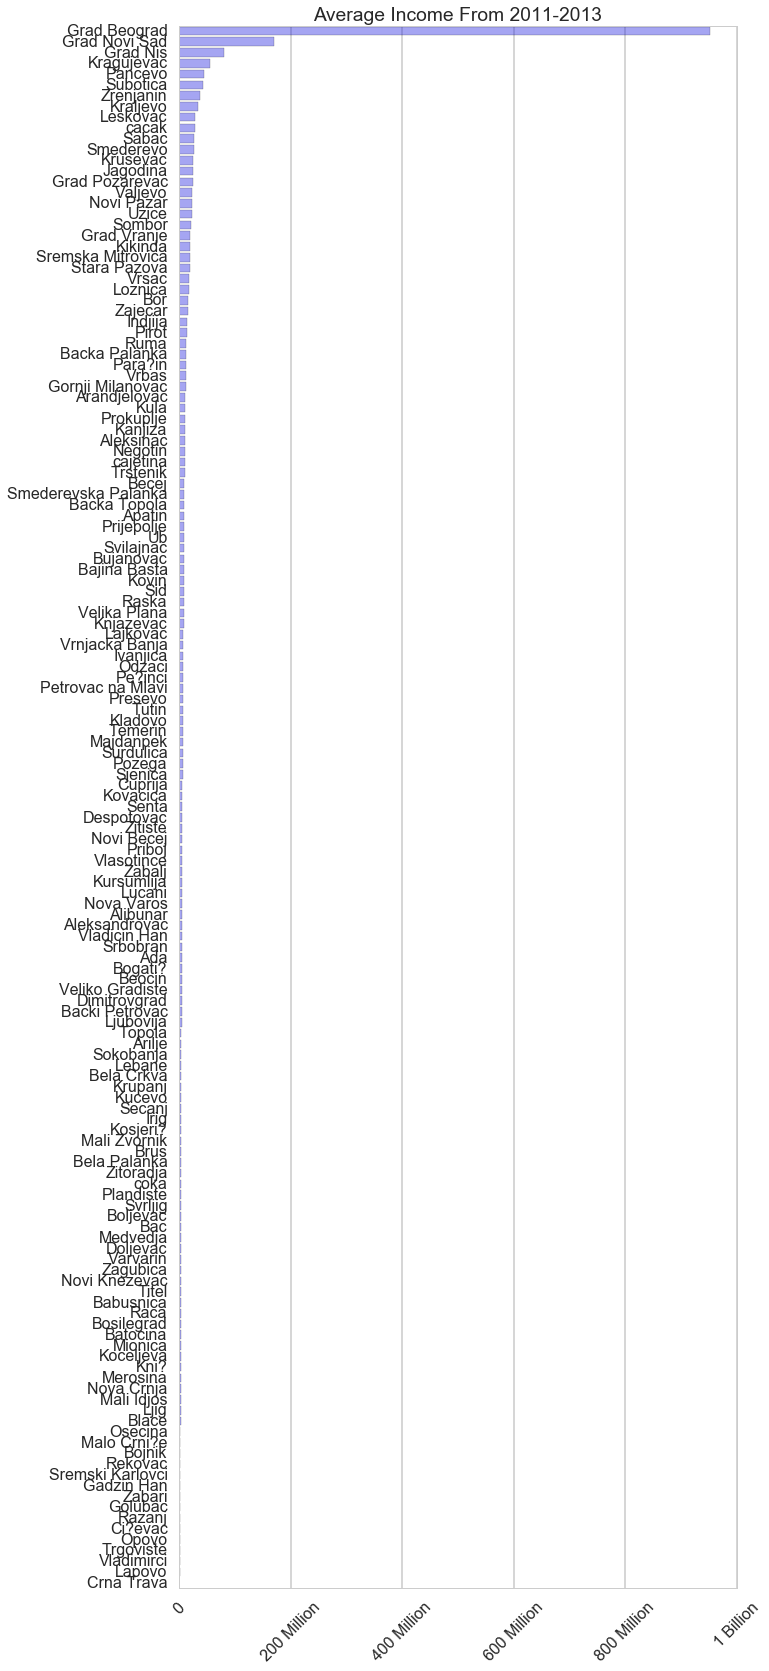

In [107]:
# chart 
fig, ax = plt.subplots(figsize=(10,28))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millify))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);
  

data = incomesdf.groupby(["mun","year"]).income_value.sum().mean(level=0)
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.xlim((0,1* math.pow(10,9)))
plt.title("Average Income From 2011-2013");

**Breakdown of Total Income** - skewed by bigger municipalities

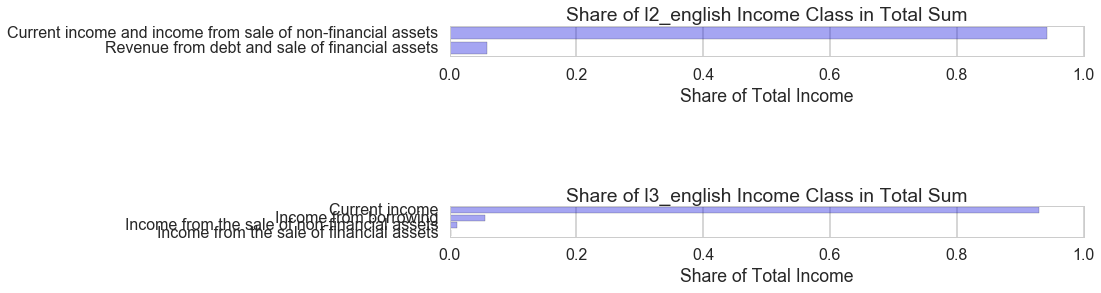

In [108]:
# multiple plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
fig.tight_layout(h_pad=6.0)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=0);   

#list of classes over which to iterate graphs
classes = ["l2_name_english", "l3_name_english"]

# make subplots
for ax, income_class in zip(axes.ravel(), classes): 
    
    # manipulate data in proper format
    data = incomesdf.groupby(income_class).income_value.agg(sum) / incomesdf.groupby(income_class).income_value.agg(sum).sum()
    data.sort_values(inplace=1, ascending=0)
    x = np.array(data.index)
    y = np.array(data.values)

    sns.barplot(y,x, color='blue', ax=ax, alpha=.4)
    

    ax.set_xlabel("Share of Total Income")
    ax.set_title("Share of " + income_class.replace("_name","") +" Income Class in Total Sum");

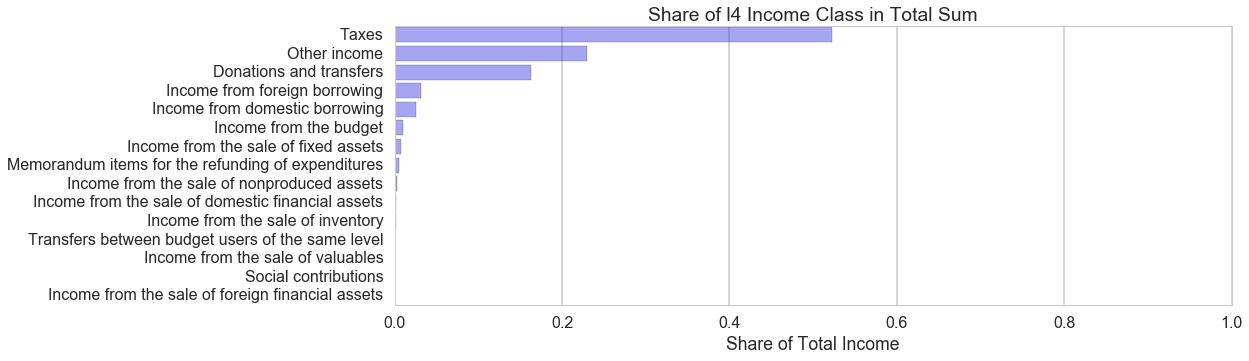

In [109]:
# chart
plt.figure(figsize=(15,5))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=0);   

data = incomesdf.groupby("l4_name_english").income_value.agg(sum) / incomesdf.groupby("l4_name_english").income_value.agg(sum).sum()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.xlim((0,1))
plt.xlabel("Share of Total Income")
plt.title("Share of l4 Income Class in Total Sum");

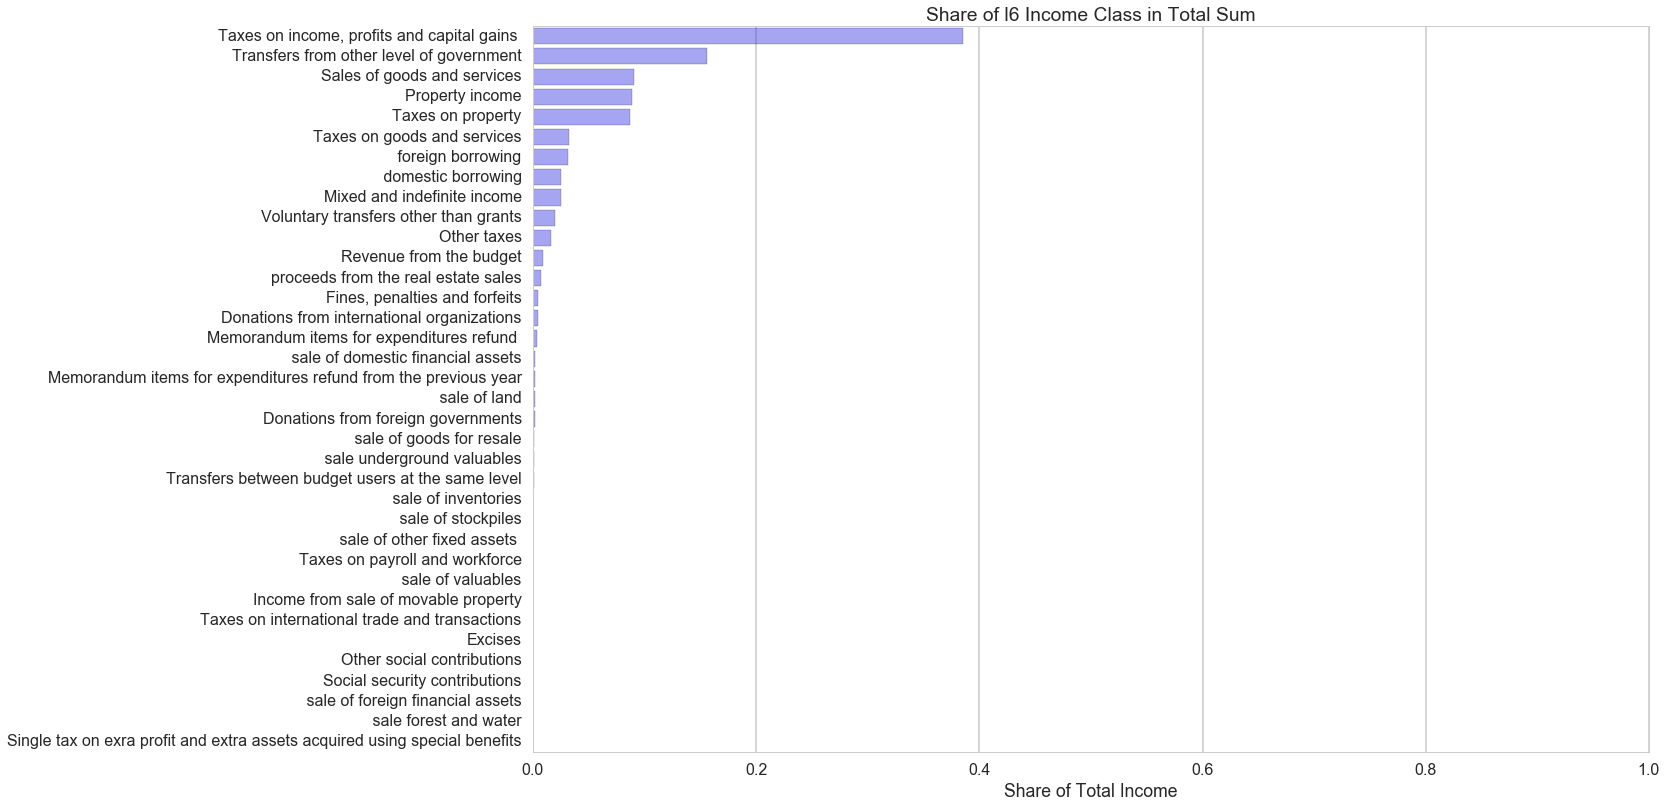

In [110]:
# chart
plt.figure(figsize=(20,13))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=0);   

data = incomesdf.groupby("l6_name_english").income_value.agg(sum) / incomesdf.groupby("l6_name_english").income_value.agg(sum).sum()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.xlim((0,1))
plt.xlabel("Share of Total Income")
plt.title("Share of l6 Income Class in Total Sum");

Comments:
- as one might expect, taxes on income and capgains provide the largest source of income for municipalities in Serbia
- transfers from other levels of government come in second place, with less than half overall contribution 

** Average Income Breakdown of Municipality ** - i.e. skewed by municipalities with extreme distributions of income sources

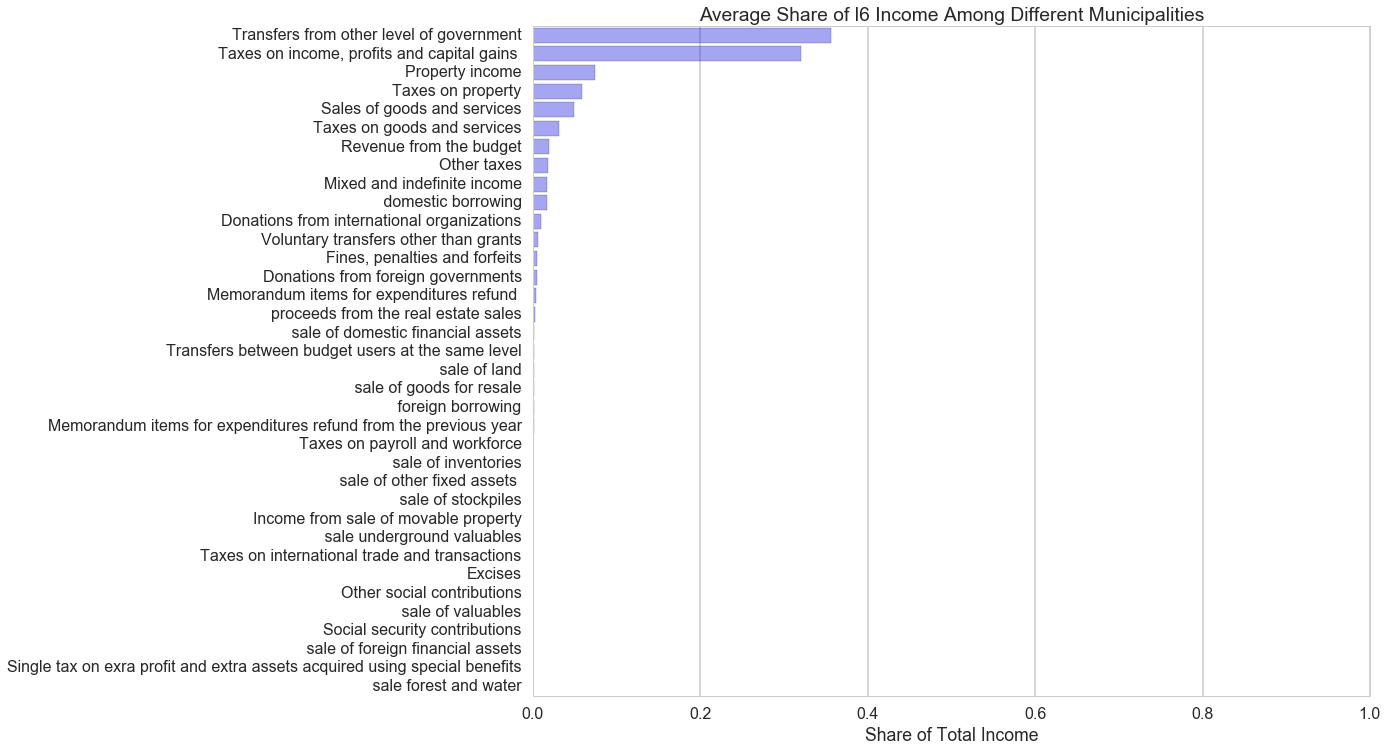

In [111]:
# chart
plt.figure(figsize=(15,12))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=0);   

data = (incomesdf.groupby(["mun", "l6_name_english"]).income_value.sum() / incomesdf.groupby(["mun", "l6_name_english"]).income_value.sum().sum(axis=0, level=0)).mean(axis=0, level=1)
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.xlim((0,1))
plt.xlabel("Share of Total Income")
plt.title("Average Share of l6 Income Among Different Municipalities");

Comments:
- note, when the average of the shares across different municipalities is taken, there is a ***reversal between the top two spots*** and trasnfers become more important that taxes and direct sources of income! This indicates that it is the larger municipalities, or municipalities with more income overall which have a greater share of their revenue derived from their taxes. 

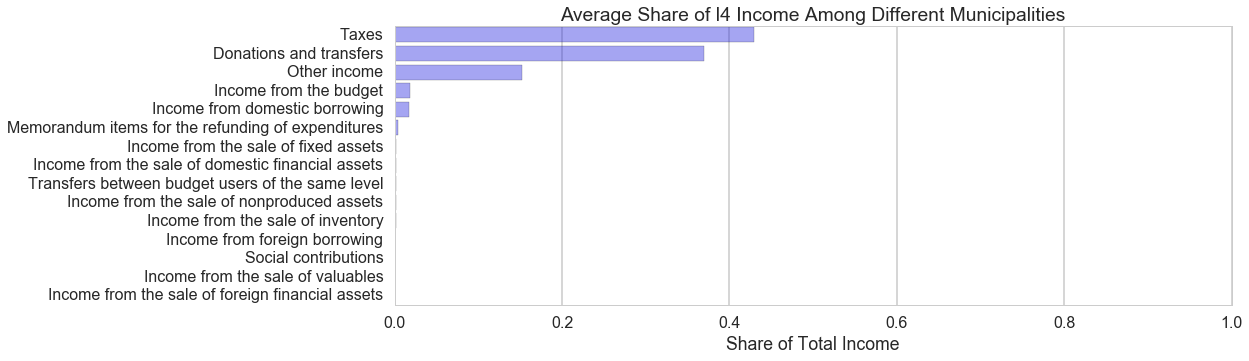

In [112]:
# chart
plt.figure(figsize=(15,5))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=0);   

data = (incomesdf.groupby(["mun", "l4_name_english"]).income_value.sum() / incomesdf.groupby(["mun", "l4_name_english"]).income_value.sum().sum(axis=0, level=0)).mean(axis=0, level=1)
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.xlim((0,1))
plt.xlabel("Share of Total Income")
plt.title("Average Share of l4 Income Among Different Municipalities");

Comments:
- while there is no reversal here, the difference between the overall tax category and overall donatios and transfers category is much less drastic, they are close to equal!

**Which Municipalities Have Largest Share of Income from Transfers and Donations?**

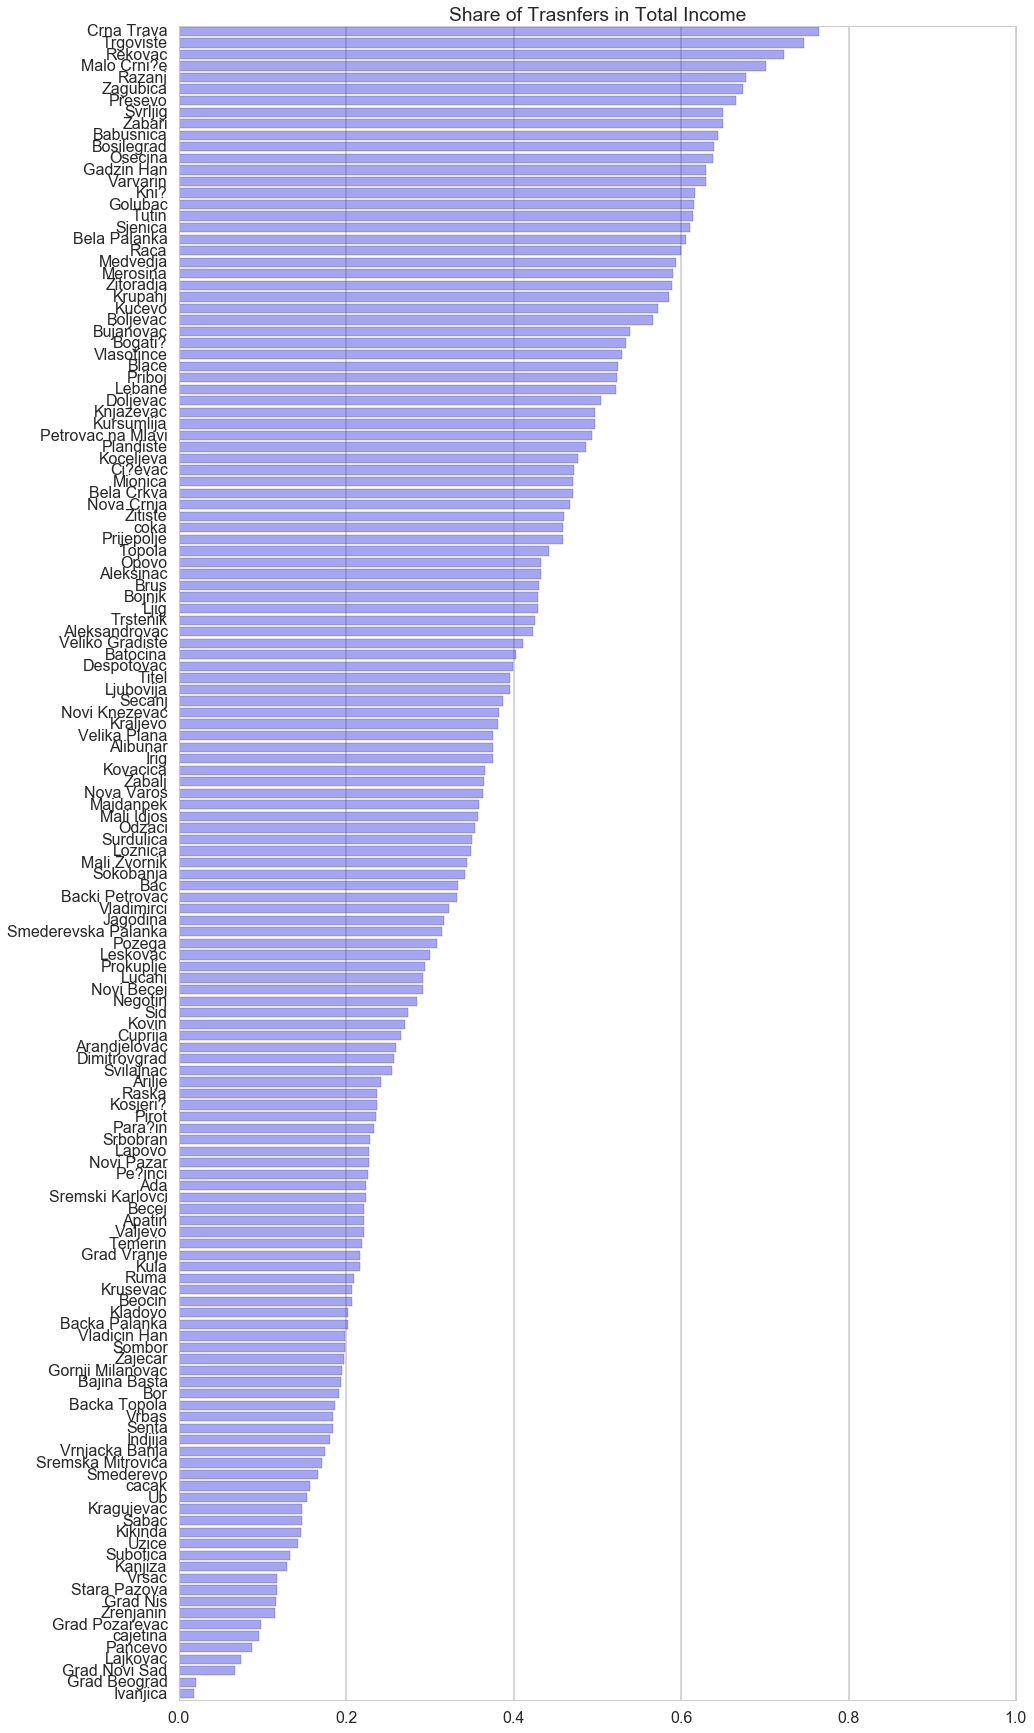

In [113]:
# chart
plt.figure(figsize=(15,30))
   

data = incomesdf[incomesdf["l6"] == 5064].groupby("mun").income_value.sum() / incomesdf.groupby("mun").income_value.sum()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.xlim((0,1))
plt.title("Share of Trasnfers in Total Income");

In [114]:
# describe distribution of above
(incomesdf[incomesdf["l6"] == 5064].groupby("mun").income_value.sum() / incomesdf.groupby("mun").income_value.sum()).describe()

count   145.00
mean      0.36
std       0.18
min       0.02
25%       0.21
50%       0.34
75%       0.49
max       0.76
Name: income_value, dtype: float64

Comments:
- it makes sense that for more wealthy municipalities such as belgrade, the share which transfers from the national government play in their total income is much smaller
- it is a bit surprising that Ivanjica is in the smaller end of the transfer share, almost to the extent where it might be an anomaly...

Below, we examine average absolute levels of trasnfers to municipalities.

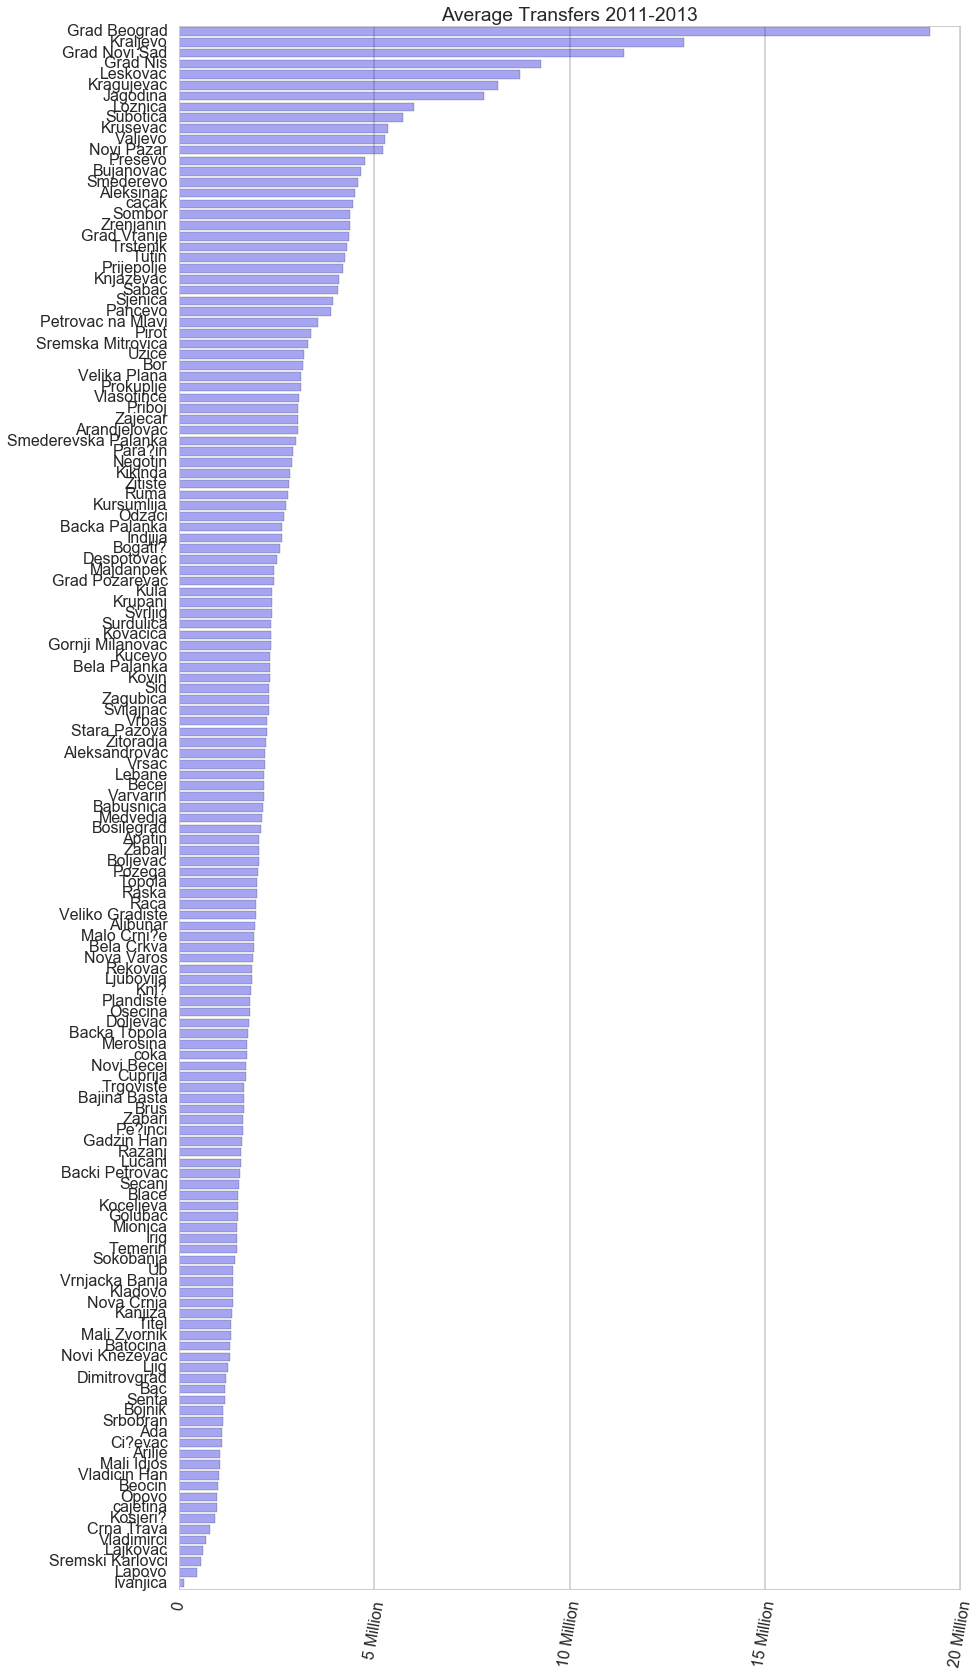

In [115]:
# chart 
fig, ax = plt.subplots(figsize=(14,28))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millify))

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=80);   

data = incomesdf[incomesdf["l6"] == 5064].copy().groupby(["mun","year"]).income_value.sum().mean(level="mun")
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

plt.title("Average Transfers 2011-2013");

In [116]:
incomesdf[incomesdf["l6"] == 5064].copy().groupby(["mun","year"]).income_value.sum()["Grad Beograd"]

year
2011   52,889,350.00
2012            0.00
2013    4,802,020.00
Name: income_value, dtype: float64

* Well, that doesn't seem right... 

# MAINDFs

## Compile munyeardf

** Totals By Year**

In [117]:
# get annual income sums
right_merge = incomesdf.groupby(["mun_id","year"]).income_value.agg(sum).reset_index()

In [118]:
# get annual spending sums
left_merge = budgetsdf.groupby(["mun_id", "year"]).agg(sum).reset_index()

In [119]:
# merge into totals_by_year
munyeardf = right_merge.merge(left_merge, how="outer", on=["mun_id","year"])

In [120]:
munyeardf = munyeardf.merge(municipal_codes_df, how="left", right_on="mb", left_on="mun_id")
munyeardf.drop("mb", axis=1, inplace=1)

In [121]:
munyeardf.mun_id = munyeardf.mun_id.astype(int)
munyeardf.year = munyeardf.year.astype(int).astype("category")
munyeardf["mun"] = munyeardf["mun"].astype("category")

In [122]:
munyeardf.head()

,mun_id,year,income_value,plan,actual,mun
0,70017,2011,"4,246,110.00",nan,nan,Aleksandrovac
1,70017,2012,"5,570,990.00",nan,nan,Aleksandrovac
2,70017,2013,"5,762,180.00",nan,nan,Aleksandrovac
3,70025,2011,"7,900,440.00",nan,nan,Aleksinac
4,70025,2012,"11,528,710.00",nan,nan,Aleksinac


In [123]:
munyeardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 6 columns):
mun_id          714 non-null int32
year            714 non-null category
income_value    435 non-null float64
plan            599 non-null float64
actual          479 non-null float64
mun             714 non-null category
dtypes: category(2), float64(3), int32(1)
memory usage: 28.5 KB


**Shares by Year**

In [ ]:
#ec_group_spending_mun_year_df = budgetsdf.groupby(["mun_id", "year", "ec_group_name_english"]).sum().unstack().reset_index()

In [ ]:
#shares_munyeardf

## Compile mundf 

In [ ]:
maindf = totals_by_yeardf.groupby('mun_id').mean().reset_index()

In [ ]:
maindf = maindf.merge(municipal_codes_df, how="left", right_on="mb", left_on="mun_id")
maindf.drop("mb", axis=1, inplace=1)

In [ ]:
maindf[[u'mun_id', u'income_value', u'plan', u'actual', u'mun']] = maindf[[u'mun_id', u'mun', u'income_value', u'plan', u'actual']]
maindf.columns = [u'mun_id', u'mun', u'mean_income_value', u'mean_plan', u'mean_actual']

In [ ]:
maindf.info()

### Add Classification Shares

In [ ]:
# function that cleans column names
def clean_column_names(x):
        if isinstance(x,tuple):
            pre, name = x
            return re.sub(r"(mean_)|(_share)","", pre) + "_" + name
        return x
    
clean_column_names = np.vectorize(clean_column_names)

** add economic group shares **

In [ ]:
temp = budgetsdf.groupby(["mun_id","year","ec_group_name_english"]).sum().reset_index()
temp[["mean_plan_share", "mean_actual_share"]] = temp.groupby(["mun_id", "year"]).transform(lambda x: x / x.sum())
temp = temp.groupby(["mun_id", "ec_group_name_english"])[["mean_plan_share", "mean_actual_share"]].mean()
maindf = maindf.merge(temp.unstack().reset_index(), how="outer", on="mun_id")
share_economic_group_columns = temp.unstack().reset_index().columns

** add functional division shares **

In [ ]:
temp = budgetsdf.groupby(["mun_id","year","func_div_name_english"]).sum().reset_index()
temp[["mean_plan_share", "mean_actual_share"]] = temp.groupby(["mun_id", "year"]).transform(lambda x: x / x.sum())
temp = temp.groupby(["mun_id", "func_div_name_english"])[["mean_plan_share", "mean_actual_share"]].mean()
maindf = maindf.merge(temp.unstack().reset_index(), how="outer", on="mun_id")
share_func_div_columns = temp.unstack().reset_index().columns

**add l4 income classification shares**

In [ ]:
temp = incomesdf.groupby(["mun_id","year","l4_name_english"]).sum().reset_index()
temp["mean_income_share"] = temp.groupby(["mun_id", "year"]).transform(lambda x: x / x.sum()).income_value
temp = temp.groupby(["mun_id", "l4_name_english"])["mean_income_share"].mean()
maindf = maindf.merge(temp.unstack(), how="outer", left_on="mun_id", right_index=1)
share_l4_income_columns = temp.unstack().columns

In [ ]:
share_l4_income_columns

In [ ]:
ec_group_plan_shares = []
ec_group_actual_shares = []
for col in clean_column_names(share_economic_group_columns):
    if re.search("plan", col):
        ec_group_plan_shares.append(col)
    if re.search("actual", col):
        ec_group_actual_shares.append(col)

ec_group_actual_shares

In [ ]:
# crazy thing
= [('mean_plan_share', 'Administrative transfers from the budget from direct budget users to indirect budget users or between users of the budget at the same level and reserve funds'),
       ('mean_plan_share', 'Compensation of employees'),
       ('mean_plan_share', 'Donations, grants and transfers'),
       ('mean_plan_share', 'Fixed assets'),
       ('mean_plan_share', 'Interest paid and the accompanying costs of borrowing'),
       ('mean_plan_share', 'Inventories'),
       ('mean_plan_share', 'Non-financial assets that are financed from the funds for the realization of the National Investment Plan'),
       ('mean_plan_share', 'Nonproduced Assets'),
       ('mean_plan_share', 'Other expenses'),
       ('mean_plan_share', 'Purchase of financial assets'),
       ('mean_plan_share', 'Repayment of principal'),
       ('mean_plan_share', 'Social security and social protection'),
       ('mean_plan_share', 'Use of goods and services'),
       ('mean_plan_share', 'Valuables'),
       ('mean_plan_share', 'depreciation and use of the funds for work'),
       ('mean_plan_share', 'subsidies'),
       ('mean_plan_share', 'unclassified')]

 = [('mean_actual_share', 'Administrative transfers from the budget from direct budget users to indirect budget users or between users of the budget at the same level and reserve funds'),
       ('mean_actual_share', 'Compensation of employees'),
       ('mean_actual_share', 'Donations, grants and transfers'),
       ('mean_actual_share', 'Fixed assets'),
       ('mean_actual_share', 'Interest paid and the accompanying costs of borrowing'),
       ('mean_actual_share', 'Inventories'),
       ('mean_actual_share', 'Non-financial assets that are financed from the funds for the realization of the National Investment Plan'),
       ('mean_actual_share', 'Nonproduced Assets'),
       ('mean_actual_share', 'Other expenses'),
       ('mean_actual_share', 'Purchase of financial assets'),
       ('mean_actual_share', 'Repayment of principal'),
       ('mean_actual_share', 'Social security and social protection'),
       ('mean_actual_share', 'Use of goods and services'),
       ('mean_actual_share', 'Valuables'),
       ('mean_actual_share', 'depreciation and use of the funds for work'),
       ('mean_actual_share', 'subsidies'),
       ('mean_actual_share', 'unclassified')]

In [ ]:
func_div_mean_plan_shares = [('mean_plan_share', 'Defence'),
       ('mean_plan_share', 'Economic Affairs'),
       ('mean_plan_share', 'Education'),
       ('mean_plan_share', 'Environmental Protection'),
       ('mean_plan_share', 'General Public Services'),
       ('mean_plan_share', 'Health'),
       ('mean_plan_share', 'Housing and Community Amenities'),
       ('mean_plan_share', 'Public Order and Safety'),
       ('mean_plan_share', 'Recreation, Culture and Religion'),
       ('mean_plan_share', 'Social Protection')]

func_div_mean_actual_shares = [('mean_actual_share', 'Defence'),
       ('mean_actual_share', 'Economic Affairs'),
       ('mean_actual_share', 'Education'),
       ('mean_actual_share', 'Environmental Protection'),
       ('mean_actual_share', 'General Public Services'),
       ('mean_actual_share', 'Health'),
       ('mean_actual_share', 'Housing and Community Amenities'),
       ('mean_actual_share', 'Public Order and Safety'),
       ('mean_actual_share', 'Recreation, Culture and Religion'),
       ('mean_actual_share', 'Social Protection')]


In [ ]:
l4_mean_income_shares = ['Donations and transfers', 'Income from domestic borrowing',
                       'Income from foreign borrowing', 'Income from the budget',
                       'Income from the sale of domestic financial assets',
                       'Income from the sale of fixed assets',
                       'Income from the sale of foreign financial assets',
                       'Income from the sale of inventory',
                       'Income from the sale of nonproduced assets',
                       'Income from the sale of valuables',
                       'Memorandum items for the refunding of expenditures',
                       'Other income', 'Social contributions', 'Taxes',
                       'Transfers between budget users of the same level']

In [ ]:
maindf.columns = clean_column_names(maindf.columns)

In [ ]:
things_to_pairplot = np.array(maindf[ec_group_mean_plan_shares + ['Donations and transfers']].fillna(0).sum().sort_values()[-5:].index)

In [ ]:
sns.set()
sns.set_context()
sns.pairplot(maindf[things_to_pairplot].fillna(0), kind='reg', size=4)

In [ ]:
budgetsdf.head()

## Mun Type Bins

### Explore Income vs Budget/Expend

# DEMOGRAPHICS

## Pre-processing

## Population Data

### Load and set-up

In [126]:
# load the dataset
basic_populationdf = pd.read_excel("./Demographics/Opstine I Regioni 2015/Povezani Podaci/basic_population_area.xlsx")

IOError: [Errno 2] No such file or directory: './Demographics/Opstine I Regioni 2015/Povezani Podaci/basic_population_area.xlsx'

In [ ]:
# get rid of rows with null district (region totals, etc)
basic_populationdf.drop(basic_populationdf[basic_populationdf.mb.isnull()].index,inplace=1)

In [ ]:
# explore dtpyptes and column names
print basic_populationdf.dtypes
print basic_populationdf.columns

In [ ]:
# change variable types to int and float
basic_populationdf.mb = basic_populationdf.mb.astype(np.int32)
for var in [u'broj_naselja', u'stanovnistvo_ukupno', u'stanovnistvo_km2', u'registrovane_mesne_zajednice', u'mesne_kancelarije']:
    basic_populationdf[var] = basic_populationdf[var].astype(float, raise_on_error=False)


In [ ]:
basic_populationdf.info()

*Note from above, there are only 173 districts with complete population data. That is odd? It could be because of the "-" values that had to be removed. It also could be due to Kosovo. Let's see which ones they are.

In [ ]:
basic_populationdf[basic_populationdf.stanovnistvo_ukupno.isnull()]

*it seems that the missing data is mostly due to kosovo entries which shouldn't be an issue

### Merging Population to mundf

First, we perform the merge. 

In [ ]:
inc_budg_pop_df = incomes_budgets_df.merge(basic_populationdf[[u'mb', u'povrsina_km2', u'stanovnistvo_ukupno']], how="left",on="mb").copy()

### Examine types, missing vals, etc.

In [ ]:
inc_budg_pop_df.info()

Comments:
- We see that population is missing for 5 entries. We exame that below.

In [ ]:
inc_budg_pop_df[inc_budg_pop_df.stanovnistvo_ukupno.isnull()]

- it turns out that uzice is the problem. Apparently the statistics office lists "Uzice City" and "Uzice" separately, which no one else does, and hence their is missing data on the subfield "Uzice". I replace the ID of Uzice City with that of Uzice and resolve the problem in this. The missing values should not occur the next time the dataset is loaded. 
- yup, worked out!

In [ ]:
inc_budg_pop_df.describe(include=["number"])

The max value for budget plan listed above is totally absurd, we check that below:

In [ ]:
inc_budg_pop_df.sort_values("plan", ascending=0).head()

No idea how that is still there... We get rid of it and continue...

In [ ]:
inc_budg_pop_df.drop(706, inplace=1)

In [ ]:
inc_budg_pop_df.sort_values("plan", ascending=0).head()

We now rename and resort the columns. 

In [ ]:
inc_budg_pop_df.columns

In [ ]:
inc_budg_pop_df.columns = [u'mb', u'year', u'income', u'transfers', u'budget', u'expenditure', u'mun', u'area', u'population']

In [ ]:
inc_budg_pop_df = inc_budg_pop_df[[u'mb', u'mun', u'year', u'budget', u'expenditure', u'income', u'transfers', u'area', u'population']]

In [ ]:
inc_budg_pop_df.head()

In [ ]:
inc_budg_pop_df[inc_budg_pop_df.mb == 79014]

### Create Per Capita Variables and Explore Trends

In [ ]:
for var in ["income", "budget", "expenditure", "transfers"]:
    inc_budg_pop_df[var +"_percap"] = inc_budg_pop_df[var] / inc_budg_pop_df.population

In [ ]:
inc_budg_pop_df.groupby("mun").budget_percap.mean().sort_values(ascending=0)

Notes on budgets per capita:
   - Bosilegrad is supposed to be one of the poorest districts, how is it's budget per capita so high? (MDULS says: "High transfers for development, makes sense")

In [ ]:
plt.figure(figsize=(10,40))
data = inc_budg_pop_df.groupby("mun").budget_percap.mean().copy()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

# set label and title values
plt.ylabel('Municipality')
plt.xlabel("Per Capita Budget")
plt.title("Average Per Capita Budget Through 2011-2015");

In [ ]:
plt.figure(figsize=(10,40))
data = inc_budg_pop_df.groupby("mun").transfers_percap.mean().copy()
data.sort_values(inplace=1, ascending=0)
x = np.array(data.index)
y = np.array(data.values)

sns.barplot(y,x, color='blue', alpha=.4)

# rotate x labels
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

# set label and title values
plt.ylabel('Municipality')
plt.xlabel("Per Capita Budget")
plt.title("Average Per Capita Transfers Through 2011-2015");

# POLITICAL

## Load and sort out data

In [ ]:
inpower_2012_df = pd.read_csv("./Political Party Switches/inpower_preelec_2012.csv")

In [ ]:
inpower_2012_df.head()

In [ ]:
# get rid of random column
inpower_2012_df.drop("Unnamed: 0", axis=1,inplace=1)

In [ ]:
inpower_2012_df.info()

In [ ]:
inpower_2012_df.columns = [u'mb', u'pe_party_id', u'pe_party_abr', u'pe_party_full']

In [ ]:
inpower_2013_df = pd.read_csv("./Political Party Switches/inpower_2013.csv")

In [ ]:
inpower_2013_df.drop("Unnamed: 0", axis=1,inplace=1)
inpower_2013_df.head()

In [ ]:
inpower_2013_df.columns = [u'mb', u'party13_id', u'party13_abr', u'party13_full']

## Annual Data

In [190]:
apaneldf = pd.read_csv("./exports/annual_political_full_detail.csv")

In [191]:
# convert date to years in int
apaneldf.date = apaneldf.date.str.replace("-\d\d-\d\d","").astype(int)

In [192]:
print apaneldf.info()
apaneldf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 17 columns):
Unnamed: 0       882 non-null int64
date             882 non-null int32
mb               882 non-null int64
party_id         882 non-null int64
munic            882 non-null object
name_abr         882 non-null object
name_full        882 non-null object
in_gov11         882 non-null int64
ingov12          882 non-null int64
ingov14          882 non-null int64
ag1_name_abr     882 non-null object
ag1_party_id     882 non-null int64
ag1_name_full    882 non-null object
ag2_name_abr     882 non-null object
ag2_party_id     882 non-null int64
ag2_name_full    882 non-null object
nat_party        882 non-null int64
dtypes: int32(1), int64(9), object(7)
memory usage: 113.8+ KB
None


,Unnamed: 0,date,mb,party_id,munic,name_abr,name_full,in_gov11,ingov12,ingov14,ag1_name_abr,ag1_party_id,ag1_name_full,ag2_name_abr,ag2_party_id,ag2_name_full,nat_party
0,0,2008,70033,2,Arandjelovac,DS,Demokratska Stranka,1,0,0,DS,2,Demokratska Stranka,DS,2,Demokratska Stranka,1
1,1,2009,70033,2,Arandjelovac,DS,Demokratska Stranka,1,0,0,DS,2,Demokratska Stranka,DS,2,Demokratska Stranka,1
2,2,2010,70033,2,Arandjelovac,DS,Demokratska Stranka,1,0,0,DS,2,Demokratska Stranka,DS,2,Demokratska Stranka,1
3,3,2011,70033,2,Arandjelovac,DS,Demokratska Stranka,1,0,0,DS,2,Demokratska Stranka,DS,2,Demokratska Stranka,1
4,4,2012,70033,2,Arandjelovac,DS,Demokratska Stranka,1,0,0,DS,2,Demokratska Stranka,DS,2,Demokratska Stranka,1


## Mege Political Data to Maindf

In [ ]:
maindf = inc_budg_pop_df.merge(inpower_2012_df, how="left", on="mb").copy()
maindf = maindf.merge(inpower_2013_df, how="left", on="mb").copy()


In [ ]:
maindf.head()

In [ ]:
maindf.info()

####  Output Maindf to csv

In [ ]:
maindf.to_csv("maindf.csv")

# HYPOTHESES

## Transfer Shares

** Calculate Share Changes **

In [276]:
# get total transfers by year
transfers = incomesdf[incomesdf.l6_name_english == 'Transfers from other level of government'].copy()
transfers_munyeardf = transfers.groupby(["mun_id","year"]).sum().drop(["l2","l4","l3","l6"], axis=1).unstack(level=1)

#normalize
norm_transfers_munyeardf = pd.DataFrame()
for col in transfers_munyeardf.columns:
    norm_transfers_munyeardf[col] = (transfers_munyeardf[col] / transfers_munyeardf[col].sum()).copy()

#find 2011, 2013 difference
share_change = pd.DataFrame()
share_change["share_change"] = ((norm_transfers_munyeardf[('income_value',2011)]
                                   - norm_transfers_munyeardf[('income_value',2013)])
                                /norm_transfers_munyeardf[('income_value',2011)]).copy()

** Alignment Changes **

In [277]:
def gov_change(df):
    if np.isnan(df["ingov11"])  | np.isnan(df["ingov13"]):
        return np.nan
    
    if (df["ingov11"] != 1) & (df["ingov13"] != 1):
        return "stayed out"
    
    if (df["ingov11"] == 1) & (df["ingov13"] == 1):
        return "stayed in"
    
    if (df["ingov11"] != 1) & (df["ingov13"] == 1):
        return "joined"
    
    if (df["ingov11"] == 1) & (df["ingov13"] != 1):
        return "left"
    
share_change["ingov11"] = apaneldf[apaneldf.date == 2011].set_index("mb").in_gov11
share_change["ingov13"] = apaneldf[apaneldf.date == 2013].set_index("mb").ingov12

share_change["gov_change"] = share_change.apply(gov_change, axis=1)

share_change["mun"] = municipal_codes_df.set_index("mb")
share_change.sort_values("share_change", ascending=0, inplace=1)

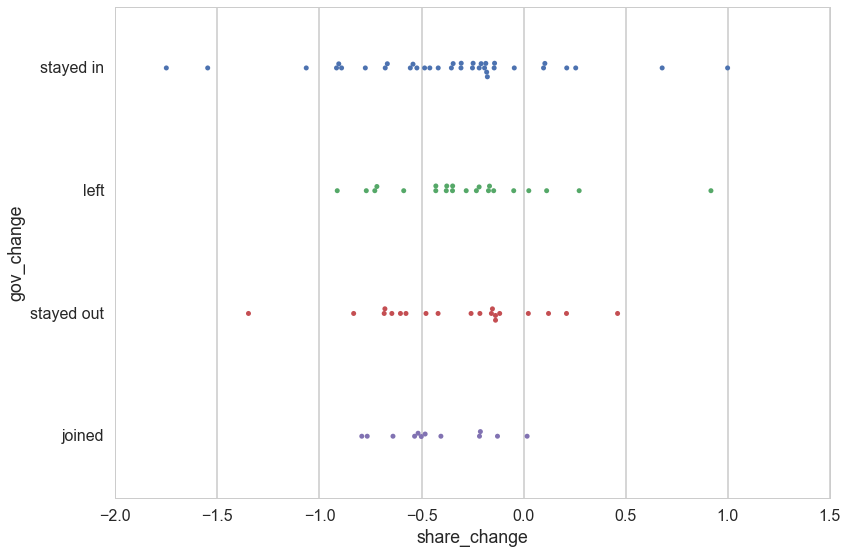

In [286]:
plt.figure()
sns.swarmplot("share_change", "gov_change" ,data=share_change.dropna())
#sns.boxplot("share_change", "gov_change" ,data=share_change.dropna())

In [274]:
share_change.dropna().head()

,share_change,ingov11,ingov13,gov_change,mun
mun_id,,,,,
79014,0.13,1.00,0.00,left,Grad Beograd
70653,0.04,1.00,1.00,stayed in,Kraljevo
80438,0.00,1.00,0.00,left,Subotica
70297,0.00,1.00,1.00,stayed in,Bojnik
80152,0.00,1.00,1.00,stayed in,Zrenjanin


In [ ]:
maindf_12pol = maindf[(maindf["pe_party_id"].notnull()) & (maindf.year == 2012)].copy()
maindf_12pol.pe_party_abr.value_counts()[:10]

In [ ]:
maindf_13pol = maindf[(maindf["party13_id"].notnull()) & (maindf.year == 2013)].copy()
maindf_13pol.party13_abr.value_counts()[:10]

In [ ]:
maindf_12pol.head()

### Comparing Means in 2012

#### Transfers

In [ ]:
maindf_12pol.transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr == "DS"].transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr == "SPS"].transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr.apply(lambda x: x not in ["DS","SPS"])].transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr != "DS"].transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr.apply(lambda x: x in ["URS","G17+"])].transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr.apply(lambda x: x not in ["DS","SPS","URS"])].transfers_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr.apply(lambda x: x in ["URS","G17+"])][["mb","mun","pe_party_abr","transfers_percap"]]

#### Expenditure

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr == "DS"].expenditure_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr != "DS"].expenditure_percap.mean()

In [ ]:
maindf_12pol[maindf_12pol.pe_party_abr.apply(lambda x: x in ["URS","G17+"])].expenditure_percap.mean()

### Comparing Means in 2013

#### Transfers

In [ ]:
maindf_13pol.transfers_percap.mean()

In [ ]:
maindf_13pol[maindf_13pol.party13_abr == "DS"].transfers_percap.mean()

In [ ]:
maindf_13pol[maindf_13pol.party13_abr != "DS"].transfers_percap.mean()

In [ ]:
maindf_13pol[maindf_13pol.party13_abr == "SNS"].transfers_percap.mean()

In [ ]:
maindf_13pol[maindf_13pol.party13_abr == "URS"].transfers_percap.mean()

### Regression on in DS or not

In [ ]:
maindf_12pol.info()

#### 2012 Regressions

In [ ]:
maindf_12pol["in_DS"] = maindf_12pol.pe_party_id.apply(lambda x: (x != 2)*1)

In [ ]:
from statsmodels.discrete import discrete_model as dm

model = dm.Logit(maindf_12pol.in_DS, maindf_12pol.budget_percap, missing="drop")
results = model.fit()
print(results.summary())

In [ ]:
model = dm.Logit(maindf_12pol.in_DS, maindf_12pol.transfers_percap, missing="drop")
results = model.fit()
print(results.summary())

In [ ]:
model = dm.Logit(maindf_12pol.in_DS, maindf_12pol.expenditure_percap, missing="drop")
results = model.fit()
print(results.summary())

#### 2013 Regressions

In [ ]:
maindf_13pol["in_SNS"] = maindf_13pol.pe_party_abr.apply(lambda x: (x == "SNS")*1)

In [ ]:
maindf_13pol["in_SNS_SPS_URS"] = maindf_13pol.pe_party_abr.apply(lambda x: (x in ["SNS","SPS","URS"])*1)

In [ ]:
maindf_13pol[maindf_13pol.budget.isnull()]

In [ ]:
model = dm.Logit(maindf_13pol.in_SNS, maindf_13pol.budget_percap, missing="drop")
results = model.fit()
print(results.summary())

In [ ]:
model = dm.Logit(maindf_13pol.in_SNS_SPS_URS, maindf_13pol.budget_percap, missing="drop")
results = model.fit()
print(results.summary())

In [ ]:
model = dm.Logit(maindf_13pol.in_SNS, maindf_13pol.transfers_percap, missing="drop")
results = model.fit()
print(results.summary())

In [ ]:
model = dm.Logit(maindf_13pol.in_SNS_SPS_URS, maindf_13pol.transfers_percap, missing="drop")
results = model.fit()
print(results.summary())